In [1]:
import os

mags_dir = "MAGs"  # Your uploaded folder
files = os.listdir(mags_dir)

print(f"Total files in '{mags_dir}':", len(files))
print("First 10 files:", files[:10])  # Show the first 10 files


Total files in 'MAGs': 159
First 10 files: ['P13S_S20_bin.4.1.fa', 'ERR2373092_bin.0.fa', 'P10S_S17_bin.63.1.fa', 'P11S_S18_bin.1.1.fa', 'P13S_S20_bin.49.1.fa', 'P10C4_S180.fa', 'P5B_S4_bin.35.1.fa', 'P11B_S7_bin.1.1.fa', 'P16B_S11_bin.3.1.fa', 'P15S_S21_bin.23.fa']


In [2]:
from collections import Counter

file_types = Counter([f.split(".")[-1] for f in files])
print("File types and counts:", file_types)


File types and counts: Counter({'fa': 158, 'ipynb_checkpoints': 1})


In [3]:
for file in os.listdir("MAGs")[:5]:  # Check the first 5 files
    with open(os.path.join("MAGs", file), "r") as f:
        first_lines = [next(f) for _ in range(5)]  # Read first 5 lines
    print(f"\n🔍 {file} preview:")
    print("".join(first_lines))



🔍 P13S_S20_bin.4.1.fa preview:
>c_000000152303
CCTTTCAGGCTGCCTTTGTGTTAAAATCGCGCCTTTGAATTTTTGTAAATGAAAGCAAAATTATGAGTTTAAAATGTGGC
ATTGTGGGTTTACCTAATGTGGGAAAATCTACACTTTTCAATGCGTTAACTAAATCAGGTATTGAAGCGGCAAATTATCC
GTTTTGCACGATTGAGCCTAATGTCGGCATCGTGGAAGTACCTGACCCACGCATGGACGAATTGGCGAAAATCGTCAATC
CACAAAAAATGCAGCCTGCAATTGTCGAATTTGTGGATATTGCTGGTCTGGTGGCGGGCGCGAGCAAGGGCGAAGGTTTG


🔍 ERR2373092_bin.0.fa preview:
>c_000000000230
TAAGGGCCGTGTGCGTGTACGTATGAACTGGCAGACAGATGGTATGCATA
CAGGCTGGGTGCGTGTGATGACACCTGATGGCGGTAGCAGTAGTGACGTA
AAGAGCAACCGTGGTTTTGTATTTATCCCAGAGGTAGGCGACCAAGTTCT
CCTCGGCTTCCGCCATGGTGACCCAGCAAGACCATATGTTATGGGTAGCC


🔍 P10S_S17_bin.63.1.fa preview:
>c_000000044233
GGCTTTATGTTAGTAAACTTCTCTTTTGCAAGTTCAAGACTTATCTTCTGATTCTGTCTATATTCTGGTAAGTTTCCAAT
CCATAGTAGTTCATTTGCTCGTTTAAAAACGCGCAACCAGTCAATTTCTGTAACGAACTCCTTAGGGACCTTATTAATAT
CACCTCCATACTTCGGATTTAATTCCGGGTAGAGAGTACCACCAAATCCTTCATATGGATACATACTTGGTAGTATTTCT
GTATTAGCCTTCCATGCCTTACCACCTACTTGTCCTGTGATAGCAACGTCCCAAACACGGTCCTCTCCATACTTTGAAAG



In [4]:
def count_fasta_sequences(filepath):
    with open(filepath, "r") as f:
        return sum(1 for line in f if line.startswith(">"))  # Count FASTA headers

mags_counts = {file: count_fasta_sequences(os.path.join("MAGs", file)) for file in os.listdir("MAGs")}
print("MAGs Contig Counts (First 10):", dict(list(mags_counts.items())[:10]))


IsADirectoryError: [Errno 21] Is a directory: 'MAGs/.ipynb_checkpoints'

In [5]:
import os

def count_contigs(filepath):
    """Count the number of contigs (FASTA headers) in a file."""
    with open(filepath, "r") as f:
        return sum(1 for line in f if line.startswith(">"))

# Get all valid FASTA files (ignore directories)
mags_contig_counts = {
    file: count_contigs(os.path.join("MAGs", file))
    for file in os.listdir("MAGs")
    if os.path.isfile(os.path.join("MAGs", file))  # Only process files, not directories
}

# Display results
print("MAGs Contig Counts (First 10):", dict(list(mags_contig_counts.items())[:10]))


MAGs Contig Counts (First 10): {'P13S_S20_bin.4.1.fa': 504, 'ERR2373092_bin.0.fa': 78, 'P10S_S17_bin.63.1.fa': 218, 'P11S_S18_bin.1.1.fa': 474, 'P13S_S20_bin.49.1.fa': 651, 'P10C4_S180.fa': 526, 'P5B_S4_bin.35.1.fa': 502, 'P11B_S7_bin.1.1.fa': 211, 'P16B_S11_bin.3.1.fa': 79, 'P15S_S21_bin.23.fa': 223}


Total MAGs: 158
Min contigs: 17
Max contigs: 1094
Mean contigs: 241.35
Median contigs: 198.5


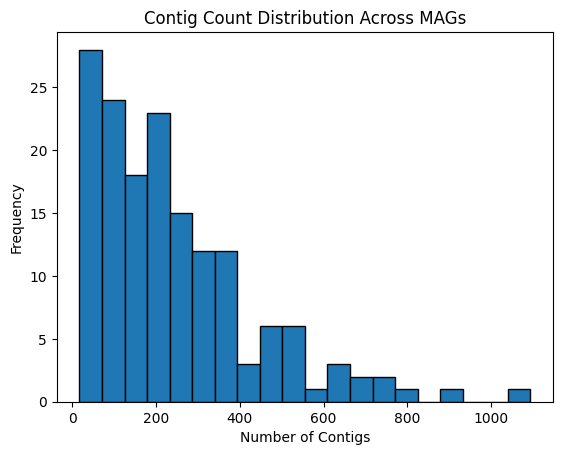

In [8]:
import numpy as np
import matplotlib.pyplot as plt

contig_counts = list(mags_contig_counts.values())

# Summary statistics
print(f"Total MAGs: {len(contig_counts)}")
print(f"Min contigs: {np.min(contig_counts)}")
print(f"Max contigs: {np.max(contig_counts)}")
print(f"Mean contigs: {np.mean(contig_counts):.2f}")
print(f"Median contigs: {np.median(contig_counts)}")

# Histogram of contig distribution
plt.hist(contig_counts, bins=20, edgecolor='black')
plt.xlabel("Number of Contigs")
plt.ylabel("Frequency")
plt.title("Contig Count Distribution Across MAGs")
plt.show()


In [7]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 23.5 MB/s eta 0:00:00


In [9]:
high_quality_mags = {k: v for k, v in mags_contig_counts.items() if v <= 200}
print(f"High-Quality MAGs (≤200 contigs): {len(high_quality_mags)}")

High-Quality MAGs (≤200 contigs): 80


In [10]:
import pandas as pd

# Load the dataset (replace 'your_file.xlsx' with the actual filename)
df = pd.read_excel("your_file.xlsx", sheet_name="Table S4")

# Filter out cultured isolates and keep only MAGs
df_filtered = df[df["Type"] == "MAG"].copy()

# Save the filtered dataset for further analysis
df_filtered.to_csv("filtered_136_MAGs.csv", index=False)

# Display summary
total_mags = len(df_filtered)
print(f"Total MAGs retained for analysis: {total_mags}")

ModuleNotFoundError: No module named 'pandas'

In [11]:
!pip install pandas openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 34.7 MB/s eta 0:00:00 0:00:01


In [1]:
import pandas as pd

# Load the data (replace 'your_file.xlsx' with the actual file path)
file_path = "your_file.xlsx"
df = pd.read_excel(file_path, sheet_name="Table S4")  # Adjust if needed

# Filter to keep only MAGs (remove cultures)
filtered_mags = df[df["Type"] == "MAG"]

# Save the filtered data
filtered_mags.to_csv("filtered_136_MAGs.csv", index=False)

# Display summary
print(f"Total MAGs after filtering: {filtered_mags.shape[0]}")
filtered_mags.head()


FileNotFoundError: [Errno 2] No such file or directory: 'your_file.xlsx'

In [2]:
import os
import pandas as pd
import shutil

# Define paths
mags_dir = "MAGs"  # Folder containing all uploaded MAG files
filtered_mags_file = "filtered_136_MAGs.csv"  # File containing the valid MAGs list

# Load the list of 136 valid MAGs (excluding cultures)
df_filtered = pd.read_csv(filtered_mags_file)

# Extract the list of valid MAG filenames
valid_mags = set(df_filtered["MAG_ID"])  # Ensure MAG_ID column contains file names

# List all files in the MAGs directory
all_files = os.listdir(mags_dir)

# Create a directory for removed culture files (optional)
removed_dir = "Removed_Cultures"
os.makedirs(removed_dir, exist_ok=True)

# Remove culture files by keeping only files in the 136 MAG list
for file in all_files:
    if file not in valid_mags:
        # Move culture files instead of deleting (optional)
        shutil.move(os.path.join(mags_dir, file), os.path.join(removed_dir, file))
        print(f"Removed: {file}")

print(f"\n✅ Cleanup complete: Only the 136 MAGs remain in '{mags_dir}'.")

FileNotFoundError: [Errno 2] No such file or directory: 'filtered_136_MAGs.csv'

In [1]:
import os
import subprocess

# Define paths
mags_dir = "MAGs"  # Folder where MAGs are stored
output_dir = "Prokka_Annotations"  # Folder where Prokka results will be saved
os.makedirs(output_dir, exist_ok=True)  # Create output directory if it doesn't exist

# List all MAGs (.fa files) in the directory
mags_files = [f for f in os.listdir(mags_dir) if f.endswith(".fa")]

# Run Prokka annotation for each MAG
for mag in mags_files:
    mag_path = os.path.join(mags_dir, mag)
    output_path = os.path.join(output_dir, mag.replace(".fa", "_prokka"))
    
    prokka_cmd = f"prokka --outdir {output_path} --prefix {mag.replace('.fa', '')} {mag_path}"
    
    print(f"Running Prokka for: {mag}")
    subprocess.run(prokka_cmd, shell=True)

print("\n✅ Prokka annotation completed for all MAGs. Results are in:", output_dir)


Running Prokka for: P13S_S20_bin.4.1.fa


[17:26:13] This is prokka 1.14.6
[17:26:13] Written by Torsten Seemann <torsten.seemann@gmail.com>
[17:26:13] Homepage is https://github.com/tseemann/prokka
[17:26:13] Local time is Wed Feb 12 17:26:13 2025
[17:26:13] You are not telling me who you are!
[17:26:13] Operating system is linux
[17:26:13] You have BioPerl 1.7.8
Argument "1.7.8" isn't numeric in numeric lt (<) at /shared/team/conda/mihaelasimion2.pallen-group/microbiome_env/bin/prokka line 259.
[17:26:13] System has 48 cores.
[17:26:13] Will use maximum of 8 cores.
[17:26:13] Annotating as >>> Bacteria <<<
[17:26:13] Generating locus_tag from 'MAGs/P13S_S20_bin.4.1.fa' contents.
[17:26:13] Setting --locustag CDECJANI from MD5 cdec3a72b387915a5c8136e416d47f18
[17:26:13] Creating new output folder: Prokka_Annotations/P13S_S20_bin.4.1_prokka
[17:26:13] Running: mkdir -p Prokka_Annotations\/P13S_S20_bin\.4\.1_prokka
[17:26:13] Using filename prefix: P13S_S20_bin.4.1.XXX
[17:26:13] Setting HMMER_NCPU=1
[17:26:13] Writing log to: 

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13S_S20_bin.4.1_prokka/P13S_S20_bin.4.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13S_S20_bin.4.1_prokka/P13S_S20_bin.4.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373092_bin.0.fa


[17:27:33] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.4.1_prokka/errorsummary.val
[17:27:33] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.4.1_prokka/P13S_S20_bin.4.1.dr
[17:27:33] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.4.1_prokka/P13S_S20_bin.4.1.fixedproducts
[17:27:33] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.4.1_prokka/P13S_S20_bin.4.1.ecn
[17:27:33] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.4.1_prokka/P13S_S20_bin.4.1.val
[17:27:33] Repairing broken .GBK output that tbl2asn produces...
[17:27:33] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P13S_S20_bin\.4\.1_prokka\/P13S_S20_bin\.4\.1\.gbf > Prokka_Annotations\/P13S_S20_bin\.4\.1_prokka\/P13S_S20_bin\.4\.1\.gbk
[17:27:33] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.4.1_prokka/P13S_S20_bin.4.1.gbf
[17:27:33] Output files:
[17:27:33] Prokka_Annotations/P13S_S20_bin.4.1_prokka/P13S_S20_bin.4.1.err
[17:27:33] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373092_bin.0_prokka/ERR2373092_bin.0.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373092_bin.0_prokka/ERR2373092_bin.0.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P10S_S17_bin.63.1.fa


[17:29:08] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.0_prokka/errorsummary.val
[17:29:08] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.0_prokka/ERR2373092_bin.0.dr
[17:29:08] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.0_prokka/ERR2373092_bin.0.fixedproducts
[17:29:08] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.0_prokka/ERR2373092_bin.0.ecn
[17:29:08] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.0_prokka/ERR2373092_bin.0.val
[17:29:08] Repairing broken .GBK output that tbl2asn produces...
[17:29:08] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373092_bin\.0_prokka\/ERR2373092_bin\.0\.gbf > Prokka_Annotations\/ERR2373092_bin\.0_prokka\/ERR2373092_bin\.0\.gbk
[17:29:08] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.0_prokka/ERR2373092_bin.0.gbf
[17:29:08] Output files:
[17:29:08] Prokka_Annotations/ERR2373092_bin.0_prokka/ERR2373092_bin.0.err
[17:29:08] Prokka_Annota

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P10S_S17_bin.63.1_prokka/P10S_S17_bin.63.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P10S_S17_bin.63.1_prokka/P10S_S17_bin.63.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P11S_S18_bin.1.1.fa


[17:31:33] Deleting unwanted file: Prokka_Annotations/P10S_S17_bin.63.1_prokka/errorsummary.val
[17:31:33] Deleting unwanted file: Prokka_Annotations/P10S_S17_bin.63.1_prokka/P10S_S17_bin.63.1.dr
[17:31:33] Deleting unwanted file: Prokka_Annotations/P10S_S17_bin.63.1_prokka/P10S_S17_bin.63.1.fixedproducts
[17:31:33] Deleting unwanted file: Prokka_Annotations/P10S_S17_bin.63.1_prokka/P10S_S17_bin.63.1.ecn
[17:31:33] Deleting unwanted file: Prokka_Annotations/P10S_S17_bin.63.1_prokka/P10S_S17_bin.63.1.val
[17:31:33] Repairing broken .GBK output that tbl2asn produces...
[17:31:33] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P10S_S17_bin\.63\.1_prokka\/P10S_S17_bin\.63\.1\.gbf > Prokka_Annotations\/P10S_S17_bin\.63\.1_prokka\/P10S_S17_bin\.63\.1\.gbk
[17:31:34] Deleting unwanted file: Prokka_Annotations/P10S_S17_bin.63.1_prokka/P10S_S17_bin.63.1.gbf
[17:31:34] Output files:
[17:31:34] Prokka_Annotations/P10S_S17_bin.63.1_prokka/P10S_S17_bin.63.1.gbk
[17

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P11S_S18_bin.1.1_prokka/P11S_S18_bin.1.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P11S_S18_bin.1.1_prokka/P11S_S18_bin.1.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P13S_S20_bin.49.1.fa


[17:33:11] Deleting unwanted file: Prokka_Annotations/P11S_S18_bin.1.1_prokka/errorsummary.val
[17:33:11] Deleting unwanted file: Prokka_Annotations/P11S_S18_bin.1.1_prokka/P11S_S18_bin.1.1.dr
[17:33:11] Deleting unwanted file: Prokka_Annotations/P11S_S18_bin.1.1_prokka/P11S_S18_bin.1.1.fixedproducts
[17:33:11] Deleting unwanted file: Prokka_Annotations/P11S_S18_bin.1.1_prokka/P11S_S18_bin.1.1.ecn
[17:33:11] Deleting unwanted file: Prokka_Annotations/P11S_S18_bin.1.1_prokka/P11S_S18_bin.1.1.val
[17:33:11] Repairing broken .GBK output that tbl2asn produces...
[17:33:11] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P11S_S18_bin\.1\.1_prokka\/P11S_S18_bin\.1\.1\.gbf > Prokka_Annotations\/P11S_S18_bin\.1\.1_prokka\/P11S_S18_bin\.1\.1\.gbk
[17:33:11] Deleting unwanted file: Prokka_Annotations/P11S_S18_bin.1.1_prokka/P11S_S18_bin.1.1.gbf
[17:33:11] Output files:
[17:33:11] Prokka_Annotations/P11S_S18_bin.1.1_prokka/P11S_S18_bin.1.1.fna
[17:33:11] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13S_S20_bin.49.1_prokka/P13S_S20_bin.49.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13S_S20_bin.49.1_prokka/P13S_S20_bin.49.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P5B_S4_bin.35.1.fa


[17:35:22] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.49.1_prokka/errorsummary.val
[17:35:22] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.49.1_prokka/P13S_S20_bin.49.1.dr
[17:35:22] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.49.1_prokka/P13S_S20_bin.49.1.fixedproducts
[17:35:22] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.49.1_prokka/P13S_S20_bin.49.1.ecn
[17:35:22] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.49.1_prokka/P13S_S20_bin.49.1.val
[17:35:22] Repairing broken .GBK output that tbl2asn produces...
[17:35:22] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P13S_S20_bin\.49\.1_prokka\/P13S_S20_bin\.49\.1\.gbf > Prokka_Annotations\/P13S_S20_bin\.49\.1_prokka\/P13S_S20_bin\.49\.1\.gbk
[17:35:22] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.49.1_prokka/P13S_S20_bin.49.1.gbf
[17:35:22] Output files:
[17:35:22] Prokka_Annotations/P13S_S20_bin.49.1_prokka/P13S_S20_bin.49.1.fna
[17

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P5B_S4_bin.35.1_prokka/P5B_S4_bin.35.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P5B_S4_bin.35.1_prokka/P5B_S4_bin.35.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P11B_S7_bin.1.1.fa


[17:36:28] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.35.1_prokka/errorsummary.val
[17:36:28] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.35.1_prokka/P5B_S4_bin.35.1.dr
[17:36:28] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.35.1_prokka/P5B_S4_bin.35.1.fixedproducts
[17:36:28] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.35.1_prokka/P5B_S4_bin.35.1.ecn
[17:36:28] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.35.1_prokka/P5B_S4_bin.35.1.val
[17:36:28] Repairing broken .GBK output that tbl2asn produces...
[17:36:28] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P5B_S4_bin\.35\.1_prokka\/P5B_S4_bin\.35\.1\.gbf > Prokka_Annotations\/P5B_S4_bin\.35\.1_prokka\/P5B_S4_bin\.35\.1\.gbk
[17:36:28] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.35.1_prokka/P5B_S4_bin.35.1.gbf
[17:36:28] Output files:
[17:36:28] Prokka_Annotations/P5B_S4_bin.35.1_prokka/P5B_S4_bin.35.1.sqn
[17:36:28] Prokka_Annotations/P5B_S4_

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P11B_S7_bin.1.1_prokka/P11B_S7_bin.1.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P11B_S7_bin.1.1_prokka/P11B_S7_bin.1.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P16B_S11_bin.3.1.fa


[17:37:43] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.1.1_prokka/errorsummary.val
[17:37:43] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.1.1_prokka/P11B_S7_bin.1.1.dr
[17:37:43] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.1.1_prokka/P11B_S7_bin.1.1.fixedproducts
[17:37:43] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.1.1_prokka/P11B_S7_bin.1.1.ecn
[17:37:43] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.1.1_prokka/P11B_S7_bin.1.1.val
[17:37:43] Repairing broken .GBK output that tbl2asn produces...
[17:37:43] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P11B_S7_bin\.1\.1_prokka\/P11B_S7_bin\.1\.1\.gbf > Prokka_Annotations\/P11B_S7_bin\.1\.1_prokka\/P11B_S7_bin\.1\.1\.gbk
[17:37:43] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.1.1_prokka/P11B_S7_bin.1.1.gbf
[17:37:43] Output files:
[17:37:43] Prokka_Annotations/P11B_S7_bin.1.1_prokka/P11B_S7_bin.1.1.fna
[17:37:43] Prokka_Annotations/P11B_S7

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P16B_S11_bin.3.1_prokka/P16B_S11_bin.3.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P16B_S11_bin.3.1_prokka/P16B_S11_bin.3.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P15S_S21_bin.23.fa


[17:39:23] Deleting unwanted file: Prokka_Annotations/P16B_S11_bin.3.1_prokka/errorsummary.val
[17:39:23] Deleting unwanted file: Prokka_Annotations/P16B_S11_bin.3.1_prokka/P16B_S11_bin.3.1.dr
[17:39:23] Deleting unwanted file: Prokka_Annotations/P16B_S11_bin.3.1_prokka/P16B_S11_bin.3.1.fixedproducts
[17:39:23] Deleting unwanted file: Prokka_Annotations/P16B_S11_bin.3.1_prokka/P16B_S11_bin.3.1.ecn
[17:39:23] Deleting unwanted file: Prokka_Annotations/P16B_S11_bin.3.1_prokka/P16B_S11_bin.3.1.val
[17:39:23] Repairing broken .GBK output that tbl2asn produces...
[17:39:23] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P16B_S11_bin\.3\.1_prokka\/P16B_S11_bin\.3\.1\.gbf > Prokka_Annotations\/P16B_S11_bin\.3\.1_prokka\/P16B_S11_bin\.3\.1\.gbk
[17:39:23] Deleting unwanted file: Prokka_Annotations/P16B_S11_bin.3.1_prokka/P16B_S11_bin.3.1.gbf
[17:39:23] Output files:
[17:39:23] Prokka_Annotations/P16B_S11_bin.3.1_prokka/P16B_S11_bin.3.1.log
[17:39:23] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P15S_S21_bin.23_prokka/P15S_S21_bin.23.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P15S_S21_bin.23_prokka/P15S_S21_bin.23.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373124_bin.2.1.fa


[17:41:07] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.23_prokka/errorsummary.val
[17:41:07] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.23_prokka/P15S_S21_bin.23.dr
[17:41:07] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.23_prokka/P15S_S21_bin.23.fixedproducts
[17:41:07] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.23_prokka/P15S_S21_bin.23.ecn
[17:41:07] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.23_prokka/P15S_S21_bin.23.val
[17:41:07] Repairing broken .GBK output that tbl2asn produces...
[17:41:07] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P15S_S21_bin\.23_prokka\/P15S_S21_bin\.23\.gbf > Prokka_Annotations\/P15S_S21_bin\.23_prokka\/P15S_S21_bin\.23\.gbk
[17:41:07] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.23_prokka/P15S_S21_bin.23.gbf
[17:41:07] Output files:
[17:41:07] Prokka_Annotations/P15S_S21_bin.23_prokka/P15S_S21_bin.23.ffn
[17:41:07] Prokka_Annotations/P15S_S21_bi

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373124_bin.2.1_prokka/ERR2373124_bin.2.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373124_bin.2.1_prokka/ERR2373124_bin.2.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P6B_S5_bin.002.fa


[17:43:16] Deleting unwanted file: Prokka_Annotations/ERR2373124_bin.2.1_prokka/errorsummary.val
[17:43:16] Deleting unwanted file: Prokka_Annotations/ERR2373124_bin.2.1_prokka/ERR2373124_bin.2.1.dr
[17:43:16] Deleting unwanted file: Prokka_Annotations/ERR2373124_bin.2.1_prokka/ERR2373124_bin.2.1.fixedproducts
[17:43:16] Deleting unwanted file: Prokka_Annotations/ERR2373124_bin.2.1_prokka/ERR2373124_bin.2.1.ecn
[17:43:16] Deleting unwanted file: Prokka_Annotations/ERR2373124_bin.2.1_prokka/ERR2373124_bin.2.1.val
[17:43:16] Repairing broken .GBK output that tbl2asn produces...
[17:43:16] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373124_bin\.2\.1_prokka\/ERR2373124_bin\.2\.1\.gbf > Prokka_Annotations\/ERR2373124_bin\.2\.1_prokka\/ERR2373124_bin\.2\.1\.gbk
[17:43:16] Deleting unwanted file: Prokka_Annotations/ERR2373124_bin.2.1_prokka/ERR2373124_bin.2.1.gbf
[17:43:16] Output files:
[17:43:16] Prokka_Annotations/ERR2373124_bin.2.1_prokka/ERR237312

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6B_S5_bin.002_prokka/P6B_S5_bin.002.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6B_S5_bin.002_prokka/P6B_S5_bin.002.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P11B_S7_bin.86.1.fa


[17:45:06] Deleting unwanted file: Prokka_Annotations/P6B_S5_bin.002_prokka/errorsummary.val
[17:45:06] Deleting unwanted file: Prokka_Annotations/P6B_S5_bin.002_prokka/P6B_S5_bin.002.dr
[17:45:06] Deleting unwanted file: Prokka_Annotations/P6B_S5_bin.002_prokka/P6B_S5_bin.002.fixedproducts
[17:45:06] Deleting unwanted file: Prokka_Annotations/P6B_S5_bin.002_prokka/P6B_S5_bin.002.ecn
[17:45:06] Deleting unwanted file: Prokka_Annotations/P6B_S5_bin.002_prokka/P6B_S5_bin.002.val
[17:45:06] Repairing broken .GBK output that tbl2asn produces...
[17:45:06] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P6B_S5_bin\.002_prokka\/P6B_S5_bin\.002\.gbf > Prokka_Annotations\/P6B_S5_bin\.002_prokka\/P6B_S5_bin\.002\.gbk
[17:45:06] Deleting unwanted file: Prokka_Annotations/P6B_S5_bin.002_prokka/P6B_S5_bin.002.gbf
[17:45:06] Output files:
[17:45:06] Prokka_Annotations/P6B_S5_bin.002_prokka/P6B_S5_bin.002.ffn
[17:45:06] Prokka_Annotations/P6B_S5_bin.002_prokka/P6B_S5

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P11B_S7_bin.86.1_prokka/P11B_S7_bin.86.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P11B_S7_bin.86.1_prokka/P11B_S7_bin.86.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P15S_S21_bin.40.1.fa


[17:46:39] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.86.1_prokka/errorsummary.val
[17:46:39] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.86.1_prokka/P11B_S7_bin.86.1.dr
[17:46:39] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.86.1_prokka/P11B_S7_bin.86.1.fixedproducts
[17:46:39] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.86.1_prokka/P11B_S7_bin.86.1.ecn
[17:46:39] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.86.1_prokka/P11B_S7_bin.86.1.val
[17:46:39] Repairing broken .GBK output that tbl2asn produces...
[17:46:39] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P11B_S7_bin\.86\.1_prokka\/P11B_S7_bin\.86\.1\.gbf > Prokka_Annotations\/P11B_S7_bin\.86\.1_prokka\/P11B_S7_bin\.86\.1\.gbk
[17:46:39] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.86.1_prokka/P11B_S7_bin.86.1.gbf
[17:46:39] Output files:
[17:46:39] Prokka_Annotations/P11B_S7_bin.86.1_prokka/P11B_S7_bin.86.1.gbk
[17:46:39] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P15S_S21_bin.40.1_prokka/P15S_S21_bin.40.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P15S_S21_bin.40.1_prokka/P15S_S21_bin.40.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P6B_S5_bin3.fa


[17:48:05] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.40.1_prokka/errorsummary.val
[17:48:05] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.40.1_prokka/P15S_S21_bin.40.1.dr
[17:48:05] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.40.1_prokka/P15S_S21_bin.40.1.fixedproducts
[17:48:05] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.40.1_prokka/P15S_S21_bin.40.1.ecn
[17:48:05] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.40.1_prokka/P15S_S21_bin.40.1.val
[17:48:05] Repairing broken .GBK output that tbl2asn produces...
[17:48:05] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P15S_S21_bin\.40\.1_prokka\/P15S_S21_bin\.40\.1\.gbf > Prokka_Annotations\/P15S_S21_bin\.40\.1_prokka\/P15S_S21_bin\.40\.1\.gbk
[17:48:05] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.40.1_prokka/P15S_S21_bin.40.1.gbf
[17:48:05] Output files:
[17:48:05] Prokka_Annotations/P15S_S21_bin.40.1_prokka/P15S_S21_bin.40.1.fna
[17

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6B_S5_bin3_prokka/P6B_S5_bin3.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6B_S5_bin3_prokka/P6B_S5_bin3.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: PID_0798_P5B_S4_concoct_14_1-contigs.fa


[17:49:17] Deleting unwanted file: Prokka_Annotations/P6B_S5_bin3_prokka/errorsummary.val
[17:49:17] Deleting unwanted file: Prokka_Annotations/P6B_S5_bin3_prokka/P6B_S5_bin3.dr
[17:49:17] Deleting unwanted file: Prokka_Annotations/P6B_S5_bin3_prokka/P6B_S5_bin3.fixedproducts
[17:49:17] Deleting unwanted file: Prokka_Annotations/P6B_S5_bin3_prokka/P6B_S5_bin3.ecn
[17:49:17] Deleting unwanted file: Prokka_Annotations/P6B_S5_bin3_prokka/P6B_S5_bin3.val
[17:49:17] Repairing broken .GBK output that tbl2asn produces...
[17:49:17] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P6B_S5_bin3_prokka\/P6B_S5_bin3\.gbf > Prokka_Annotations\/P6B_S5_bin3_prokka\/P6B_S5_bin3\.gbk
[17:49:17] Deleting unwanted file: Prokka_Annotations/P6B_S5_bin3_prokka/P6B_S5_bin3.gbf
[17:49:17] Output files:
[17:49:17] Prokka_Annotations/P6B_S5_bin3_prokka/P6B_S5_bin3.tbl
[17:49:17] Prokka_Annotations/P6B_S5_bin3_prokka/P6B_S5_bin3.log
[17:49:17] Prokka_Annotations/P6B_S5_bin3_prokka

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/PID_0798_P5B_S4_concoct_14_1-contigs_prokka/PID_0798_P5B_S4_concoct_14_1-contigs.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/PID_0798_P5B_S4_concoct_14_1-contigs_prokka/PID_0798_P5B_S4_concoct_14_1-contigs.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P6S_S16_bin.5.fa


[17:50:28] Deleting unwanted file: Prokka_Annotations/PID_0798_P5B_S4_concoct_14_1-contigs_prokka/errorsummary.val
[17:50:28] Deleting unwanted file: Prokka_Annotations/PID_0798_P5B_S4_concoct_14_1-contigs_prokka/PID_0798_P5B_S4_concoct_14_1-contigs.dr
[17:50:28] Deleting unwanted file: Prokka_Annotations/PID_0798_P5B_S4_concoct_14_1-contigs_prokka/PID_0798_P5B_S4_concoct_14_1-contigs.fixedproducts
[17:50:28] Deleting unwanted file: Prokka_Annotations/PID_0798_P5B_S4_concoct_14_1-contigs_prokka/PID_0798_P5B_S4_concoct_14_1-contigs.ecn
[17:50:28] Deleting unwanted file: Prokka_Annotations/PID_0798_P5B_S4_concoct_14_1-contigs_prokka/PID_0798_P5B_S4_concoct_14_1-contigs.val
[17:50:28] Repairing broken .GBK output that tbl2asn produces...
[17:50:28] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/PID_0798_P5B_S4_concoct_14_1\-contigs_prokka\/PID_0798_P5B_S4_concoct_14_1\-contigs\.gbf > Prokka_Annotations\/PID_0798_P5B_S4_concoct_14_1\-contigs_prokka\/PID_07

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6S_S16_bin.5_prokka/P6S_S16_bin.5.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6S_S16_bin.5_prokka/P6S_S16_bin.5.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P11B_S7_bin.41.fa


[17:51:54] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.5_prokka/errorsummary.val
[17:51:54] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.5_prokka/P6S_S16_bin.5.dr
[17:51:54] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.5_prokka/P6S_S16_bin.5.fixedproducts
[17:51:54] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.5_prokka/P6S_S16_bin.5.ecn
[17:51:54] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.5_prokka/P6S_S16_bin.5.val
[17:51:54] Repairing broken .GBK output that tbl2asn produces...
[17:51:54] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P6S_S16_bin\.5_prokka\/P6S_S16_bin\.5\.gbf > Prokka_Annotations\/P6S_S16_bin\.5_prokka\/P6S_S16_bin\.5\.gbk
[17:51:54] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.5_prokka/P6S_S16_bin.5.gbf
[17:51:54] Output files:
[17:51:54] Prokka_Annotations/P6S_S16_bin.5_prokka/P6S_S16_bin.5.fna
[17:51:54] Prokka_Annotations/P6S_S16_bin.5_prokka/P6S_S16_bin.5.sqn
[17:51

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P11B_S7_bin.41_prokka/P11B_S7_bin.41.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P11B_S7_bin.41_prokka/P11B_S7_bin.41.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373097_bin.1.fa


[17:53:48] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.41_prokka/errorsummary.val
[17:53:48] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.41_prokka/P11B_S7_bin.41.dr
[17:53:48] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.41_prokka/P11B_S7_bin.41.fixedproducts
[17:53:48] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.41_prokka/P11B_S7_bin.41.ecn
[17:53:48] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.41_prokka/P11B_S7_bin.41.val
[17:53:48] Repairing broken .GBK output that tbl2asn produces...
[17:53:48] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P11B_S7_bin\.41_prokka\/P11B_S7_bin\.41\.gbf > Prokka_Annotations\/P11B_S7_bin\.41_prokka\/P11B_S7_bin\.41\.gbk
[17:53:48] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.41_prokka/P11B_S7_bin.41.gbf
[17:53:48] Output files:
[17:53:48] Prokka_Annotations/P11B_S7_bin.41_prokka/P11B_S7_bin.41.log
[17:53:48] Prokka_Annotations/P11B_S7_bin.41_prokka/P11B_S

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373097_bin.1_prokka/ERR2373097_bin.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373097_bin.1_prokka/ERR2373097_bin.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P13S_S20_bin.18.1.fa


[17:56:00] Deleting unwanted file: Prokka_Annotations/ERR2373097_bin.1_prokka/errorsummary.val
[17:56:00] Deleting unwanted file: Prokka_Annotations/ERR2373097_bin.1_prokka/ERR2373097_bin.1.dr
[17:56:00] Deleting unwanted file: Prokka_Annotations/ERR2373097_bin.1_prokka/ERR2373097_bin.1.fixedproducts
[17:56:00] Deleting unwanted file: Prokka_Annotations/ERR2373097_bin.1_prokka/ERR2373097_bin.1.ecn
[17:56:00] Deleting unwanted file: Prokka_Annotations/ERR2373097_bin.1_prokka/ERR2373097_bin.1.val
[17:56:00] Repairing broken .GBK output that tbl2asn produces...
[17:56:00] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373097_bin\.1_prokka\/ERR2373097_bin\.1\.gbf > Prokka_Annotations\/ERR2373097_bin\.1_prokka\/ERR2373097_bin\.1\.gbk
[17:56:00] Deleting unwanted file: Prokka_Annotations/ERR2373097_bin.1_prokka/ERR2373097_bin.1.gbf
[17:56:00] Output files:
[17:56:00] Prokka_Annotations/ERR2373097_bin.1_prokka/ERR2373097_bin.1.tsv
[17:56:00] Prokka_Annota

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13S_S20_bin.18.1_prokka/P13S_S20_bin.18.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13S_S20_bin.18.1_prokka/P13S_S20_bin.18.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P3S_S13_bin.11.1.fa


[17:56:26] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.18.1_prokka/errorsummary.val
[17:56:26] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.18.1_prokka/P13S_S20_bin.18.1.dr
[17:56:26] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.18.1_prokka/P13S_S20_bin.18.1.fixedproducts
[17:56:26] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.18.1_prokka/P13S_S20_bin.18.1.ecn
[17:56:26] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.18.1_prokka/P13S_S20_bin.18.1.val
[17:56:26] Repairing broken .GBK output that tbl2asn produces...
[17:56:26] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P13S_S20_bin\.18\.1_prokka\/P13S_S20_bin\.18\.1\.gbf > Prokka_Annotations\/P13S_S20_bin\.18\.1_prokka\/P13S_S20_bin\.18\.1\.gbk
[17:56:26] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.18.1_prokka/P13S_S20_bin.18.1.gbf
[17:56:26] Output files:
[17:56:26] Prokka_Annotations/P13S_S20_bin.18.1_prokka/P13S_S20_bin.18.1.fsa
[17

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P3S_S13_bin.11.1_prokka/P3S_S13_bin.11.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P3S_S13_bin.11.1_prokka/P3S_S13_bin.11.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P6S_S16_bin.76.1.fa


[17:57:34] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.11.1_prokka/errorsummary.val
[17:57:34] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.11.1_prokka/P3S_S13_bin.11.1.dr
[17:57:34] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.11.1_prokka/P3S_S13_bin.11.1.fixedproducts
[17:57:34] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.11.1_prokka/P3S_S13_bin.11.1.ecn
[17:57:34] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.11.1_prokka/P3S_S13_bin.11.1.val
[17:57:34] Repairing broken .GBK output that tbl2asn produces...
[17:57:34] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P3S_S13_bin\.11\.1_prokka\/P3S_S13_bin\.11\.1\.gbf > Prokka_Annotations\/P3S_S13_bin\.11\.1_prokka\/P3S_S13_bin\.11\.1\.gbk
[17:57:34] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.11.1_prokka/P3S_S13_bin.11.1.gbf
[17:57:34] Output files:
[17:57:34] Prokka_Annotations/P3S_S13_bin.11.1_prokka/P3S_S13_bin.11.1.fna
[17:57:34] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6S_S16_bin.76.1_prokka/P6S_S16_bin.76.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6S_S16_bin.76.1_prokka/P6S_S16_bin.76.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373085_bin.3.fa


[17:59:05] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.76.1_prokka/errorsummary.val
[17:59:05] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.76.1_prokka/P6S_S16_bin.76.1.dr
[17:59:05] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.76.1_prokka/P6S_S16_bin.76.1.fixedproducts
[17:59:05] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.76.1_prokka/P6S_S16_bin.76.1.ecn
[17:59:05] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.76.1_prokka/P6S_S16_bin.76.1.val
[17:59:05] Repairing broken .GBK output that tbl2asn produces...
[17:59:05] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P6S_S16_bin\.76\.1_prokka\/P6S_S16_bin\.76\.1\.gbf > Prokka_Annotations\/P6S_S16_bin\.76\.1_prokka\/P6S_S16_bin\.76\.1\.gbk
[17:59:05] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.76.1_prokka/P6S_S16_bin.76.1.gbf
[17:59:05] Output files:
[17:59:05] Prokka_Annotations/P6S_S16_bin.76.1_prokka/P6S_S16_bin.76.1.faa
[17:59:05] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373085_bin.3_prokka/ERR2373085_bin.3.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373085_bin.3_prokka/ERR2373085_bin.3.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373093_bin.60.fa


[18:01:02] Deleting unwanted file: Prokka_Annotations/ERR2373085_bin.3_prokka/errorsummary.val
[18:01:02] Deleting unwanted file: Prokka_Annotations/ERR2373085_bin.3_prokka/ERR2373085_bin.3.dr
[18:01:02] Deleting unwanted file: Prokka_Annotations/ERR2373085_bin.3_prokka/ERR2373085_bin.3.fixedproducts
[18:01:02] Deleting unwanted file: Prokka_Annotations/ERR2373085_bin.3_prokka/ERR2373085_bin.3.ecn
[18:01:02] Deleting unwanted file: Prokka_Annotations/ERR2373085_bin.3_prokka/ERR2373085_bin.3.val
[18:01:02] Repairing broken .GBK output that tbl2asn produces...
[18:01:02] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373085_bin\.3_prokka\/ERR2373085_bin\.3\.gbf > Prokka_Annotations\/ERR2373085_bin\.3_prokka\/ERR2373085_bin\.3\.gbk
[18:01:02] Deleting unwanted file: Prokka_Annotations/ERR2373085_bin.3_prokka/ERR2373085_bin.3.gbf
[18:01:02] Output files:
[18:01:02] Prokka_Annotations/ERR2373085_bin.3_prokka/ERR2373085_bin.3.ffn
[18:01:02] Prokka_Annota

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373093_bin.60_prokka/ERR2373093_bin.60.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373093_bin.60_prokka/ERR2373093_bin.60.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P3S_S13_bin.6.1.fa


[18:02:39] Deleting unwanted file: Prokka_Annotations/ERR2373093_bin.60_prokka/errorsummary.val
[18:02:39] Deleting unwanted file: Prokka_Annotations/ERR2373093_bin.60_prokka/ERR2373093_bin.60.dr
[18:02:39] Deleting unwanted file: Prokka_Annotations/ERR2373093_bin.60_prokka/ERR2373093_bin.60.fixedproducts
[18:02:39] Deleting unwanted file: Prokka_Annotations/ERR2373093_bin.60_prokka/ERR2373093_bin.60.ecn
[18:02:39] Deleting unwanted file: Prokka_Annotations/ERR2373093_bin.60_prokka/ERR2373093_bin.60.val
[18:02:39] Repairing broken .GBK output that tbl2asn produces...
[18:02:39] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373093_bin\.60_prokka\/ERR2373093_bin\.60\.gbf > Prokka_Annotations\/ERR2373093_bin\.60_prokka\/ERR2373093_bin\.60\.gbk
[18:02:39] Deleting unwanted file: Prokka_Annotations/ERR2373093_bin.60_prokka/ERR2373093_bin.60.gbf
[18:02:39] Output files:
[18:02:39] Prokka_Annotations/ERR2373093_bin.60_prokka/ERR2373093_bin.60.log
[18:02:

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P3S_S13_bin.6.1_prokka/P3S_S13_bin.6.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P3S_S13_bin.6.1_prokka/P3S_S13_bin.6.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373092_bin.2.fa


[18:04:51] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.6.1_prokka/errorsummary.val
[18:04:51] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.6.1_prokka/P3S_S13_bin.6.1.dr
[18:04:51] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.6.1_prokka/P3S_S13_bin.6.1.fixedproducts
[18:04:51] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.6.1_prokka/P3S_S13_bin.6.1.ecn
[18:04:51] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.6.1_prokka/P3S_S13_bin.6.1.val
[18:04:51] Repairing broken .GBK output that tbl2asn produces...
[18:04:51] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P3S_S13_bin\.6\.1_prokka\/P3S_S13_bin\.6\.1\.gbf > Prokka_Annotations\/P3S_S13_bin\.6\.1_prokka\/P3S_S13_bin\.6\.1\.gbk
[18:04:51] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.6.1_prokka/P3S_S13_bin.6.1.gbf
[18:04:51] Output files:
[18:04:51] Prokka_Annotations/P3S_S13_bin.6.1_prokka/P3S_S13_bin.6.1.tsv
[18:04:51] Prokka_Annotations/P3S_S13

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373092_bin.2_prokka/ERR2373092_bin.2.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373092_bin.2_prokka/ERR2373092_bin.2.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373092_bin.31.1.fa


[18:06:35] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.2_prokka/errorsummary.val
[18:06:35] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.2_prokka/ERR2373092_bin.2.dr
[18:06:35] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.2_prokka/ERR2373092_bin.2.fixedproducts
[18:06:35] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.2_prokka/ERR2373092_bin.2.ecn
[18:06:35] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.2_prokka/ERR2373092_bin.2.val
[18:06:35] Repairing broken .GBK output that tbl2asn produces...
[18:06:35] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373092_bin\.2_prokka\/ERR2373092_bin\.2\.gbf > Prokka_Annotations\/ERR2373092_bin\.2_prokka\/ERR2373092_bin\.2\.gbk
[18:06:35] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.2_prokka/ERR2373092_bin.2.gbf
[18:06:35] Output files:
[18:06:35] Prokka_Annotations/ERR2373092_bin.2_prokka/ERR2373092_bin.2.gbk
[18:06:35] Prokka_Annota

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373092_bin.31.1_prokka/ERR2373092_bin.31.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373092_bin.31.1_prokka/ERR2373092_bin.31.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373090_bin.4.1.fa


[18:08:40] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.31.1_prokka/errorsummary.val
[18:08:40] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.31.1_prokka/ERR2373092_bin.31.1.dr
[18:08:40] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.31.1_prokka/ERR2373092_bin.31.1.fixedproducts
[18:08:40] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.31.1_prokka/ERR2373092_bin.31.1.ecn
[18:08:40] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.31.1_prokka/ERR2373092_bin.31.1.val
[18:08:40] Repairing broken .GBK output that tbl2asn produces...
[18:08:40] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373092_bin\.31\.1_prokka\/ERR2373092_bin\.31\.1\.gbf > Prokka_Annotations\/ERR2373092_bin\.31\.1_prokka\/ERR2373092_bin\.31\.1\.gbk
[18:08:40] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.31.1_prokka/ERR2373092_bin.31.1.gbf
[18:08:40] Output files:
[18:08:40] Prokka_Annotations/ERR2373092_bin.31.1_

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373090_bin.4.1_prokka/ERR2373090_bin.4.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373090_bin.4.1_prokka/ERR2373090_bin.4.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373117_bin.7.fa


[18:09:44] Deleting unwanted file: Prokka_Annotations/ERR2373090_bin.4.1_prokka/errorsummary.val
[18:09:44] Deleting unwanted file: Prokka_Annotations/ERR2373090_bin.4.1_prokka/ERR2373090_bin.4.1.dr
[18:09:44] Deleting unwanted file: Prokka_Annotations/ERR2373090_bin.4.1_prokka/ERR2373090_bin.4.1.fixedproducts
[18:09:44] Deleting unwanted file: Prokka_Annotations/ERR2373090_bin.4.1_prokka/ERR2373090_bin.4.1.ecn
[18:09:44] Deleting unwanted file: Prokka_Annotations/ERR2373090_bin.4.1_prokka/ERR2373090_bin.4.1.val
[18:09:44] Repairing broken .GBK output that tbl2asn produces...
[18:09:44] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373090_bin\.4\.1_prokka\/ERR2373090_bin\.4\.1\.gbf > Prokka_Annotations\/ERR2373090_bin\.4\.1_prokka\/ERR2373090_bin\.4\.1\.gbk
[18:09:44] Deleting unwanted file: Prokka_Annotations/ERR2373090_bin.4.1_prokka/ERR2373090_bin.4.1.gbf
[18:09:44] Output files:
[18:09:44] Prokka_Annotations/ERR2373090_bin.4.1_prokka/ERR237309

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373117_bin.7_prokka/ERR2373117_bin.7.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373117_bin.7_prokka/ERR2373117_bin.7.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P6S_S16_bin.11.1.fa


[18:10:21] Deleting unwanted file: Prokka_Annotations/ERR2373117_bin.7_prokka/errorsummary.val
[18:10:21] Deleting unwanted file: Prokka_Annotations/ERR2373117_bin.7_prokka/ERR2373117_bin.7.dr
[18:10:21] Deleting unwanted file: Prokka_Annotations/ERR2373117_bin.7_prokka/ERR2373117_bin.7.fixedproducts
[18:10:21] Deleting unwanted file: Prokka_Annotations/ERR2373117_bin.7_prokka/ERR2373117_bin.7.ecn
[18:10:21] Deleting unwanted file: Prokka_Annotations/ERR2373117_bin.7_prokka/ERR2373117_bin.7.val
[18:10:21] Repairing broken .GBK output that tbl2asn produces...
[18:10:21] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373117_bin\.7_prokka\/ERR2373117_bin\.7\.gbf > Prokka_Annotations\/ERR2373117_bin\.7_prokka\/ERR2373117_bin\.7\.gbk
[18:10:21] Deleting unwanted file: Prokka_Annotations/ERR2373117_bin.7_prokka/ERR2373117_bin.7.gbf
[18:10:21] Output files:
[18:10:21] Prokka_Annotations/ERR2373117_bin.7_prokka/ERR2373117_bin.7.ffn
[18:10:21] Prokka_Annota

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6S_S16_bin.11.1_prokka/P6S_S16_bin.11.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6S_S16_bin.11.1_prokka/P6S_S16_bin.11.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P6S_S16_bin.19.1.fa


[18:11:23] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.11.1_prokka/errorsummary.val
[18:11:23] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.11.1_prokka/P6S_S16_bin.11.1.dr
[18:11:23] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.11.1_prokka/P6S_S16_bin.11.1.fixedproducts
[18:11:23] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.11.1_prokka/P6S_S16_bin.11.1.ecn
[18:11:23] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.11.1_prokka/P6S_S16_bin.11.1.val
[18:11:23] Repairing broken .GBK output that tbl2asn produces...
[18:11:23] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P6S_S16_bin\.11\.1_prokka\/P6S_S16_bin\.11\.1\.gbf > Prokka_Annotations\/P6S_S16_bin\.11\.1_prokka\/P6S_S16_bin\.11\.1\.gbk
[18:11:23] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.11.1_prokka/P6S_S16_bin.11.1.gbf
[18:11:23] Output files:
[18:11:23] Prokka_Annotations/P6S_S16_bin.11.1_prokka/P6S_S16_bin.11.1.gbk
[18:11:23] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6S_S16_bin.19.1_prokka/P6S_S16_bin.19.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6S_S16_bin.19.1_prokka/P6S_S16_bin.19.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P3S_S13_bin.1.1.fa


[18:13:02] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.19.1_prokka/errorsummary.val
[18:13:02] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.19.1_prokka/P6S_S16_bin.19.1.dr
[18:13:02] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.19.1_prokka/P6S_S16_bin.19.1.fixedproducts
[18:13:02] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.19.1_prokka/P6S_S16_bin.19.1.ecn
[18:13:02] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.19.1_prokka/P6S_S16_bin.19.1.val
[18:13:02] Repairing broken .GBK output that tbl2asn produces...
[18:13:02] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P6S_S16_bin\.19\.1_prokka\/P6S_S16_bin\.19\.1\.gbf > Prokka_Annotations\/P6S_S16_bin\.19\.1_prokka\/P6S_S16_bin\.19\.1\.gbk
[18:13:03] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.19.1_prokka/P6S_S16_bin.19.1.gbf
[18:13:03] Output files:
[18:13:03] Prokka_Annotations/P6S_S16_bin.19.1_prokka/P6S_S16_bin.19.1.gff
[18:13:03] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P3S_S13_bin.1.1_prokka/P3S_S13_bin.1.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P3S_S13_bin.1.1_prokka/P3S_S13_bin.1.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P11B_S7_bin.6.fa


[18:14:55] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.1.1_prokka/errorsummary.val
[18:14:55] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.1.1_prokka/P3S_S13_bin.1.1.dr
[18:14:55] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.1.1_prokka/P3S_S13_bin.1.1.fixedproducts
[18:14:55] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.1.1_prokka/P3S_S13_bin.1.1.ecn
[18:14:55] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.1.1_prokka/P3S_S13_bin.1.1.val
[18:14:55] Repairing broken .GBK output that tbl2asn produces...
[18:14:55] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P3S_S13_bin\.1\.1_prokka\/P3S_S13_bin\.1\.1\.gbf > Prokka_Annotations\/P3S_S13_bin\.1\.1_prokka\/P3S_S13_bin\.1\.1\.gbk
[18:14:55] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.1.1_prokka/P3S_S13_bin.1.1.gbf
[18:14:55] Output files:
[18:14:55] Prokka_Annotations/P3S_S13_bin.1.1_prokka/P3S_S13_bin.1.1.gff
[18:14:55] Prokka_Annotations/P3S_S13

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P11B_S7_bin.6_prokka/P11B_S7_bin.6.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P11B_S7_bin.6_prokka/P11B_S7_bin.6.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373107_bin.7.1-contigs.fa


[18:16:31] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.6_prokka/errorsummary.val
[18:16:31] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.6_prokka/P11B_S7_bin.6.dr
[18:16:31] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.6_prokka/P11B_S7_bin.6.fixedproducts
[18:16:31] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.6_prokka/P11B_S7_bin.6.ecn
[18:16:31] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.6_prokka/P11B_S7_bin.6.val
[18:16:31] Repairing broken .GBK output that tbl2asn produces...
[18:16:31] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P11B_S7_bin\.6_prokka\/P11B_S7_bin\.6\.gbf > Prokka_Annotations\/P11B_S7_bin\.6_prokka\/P11B_S7_bin\.6\.gbk
[18:16:31] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.6_prokka/P11B_S7_bin.6.gbf
[18:16:31] Output files:
[18:16:31] Prokka_Annotations/P11B_S7_bin.6_prokka/P11B_S7_bin.6.tsv
[18:16:31] Prokka_Annotations/P11B_S7_bin.6_prokka/P11B_S7_bin.6.ffn
[18:16

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373107_bin.7.1-contigs_prokka/ERR2373107_bin.7.1-contigs.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373107_bin.7.1-contigs_prokka/ERR2373107_bin.7.1-contigs.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373093_bin.42.fa


[18:17:37] Deleting unwanted file: Prokka_Annotations/ERR2373107_bin.7.1-contigs_prokka/errorsummary.val
[18:17:37] Deleting unwanted file: Prokka_Annotations/ERR2373107_bin.7.1-contigs_prokka/ERR2373107_bin.7.1-contigs.dr
[18:17:37] Deleting unwanted file: Prokka_Annotations/ERR2373107_bin.7.1-contigs_prokka/ERR2373107_bin.7.1-contigs.fixedproducts
[18:17:37] Deleting unwanted file: Prokka_Annotations/ERR2373107_bin.7.1-contigs_prokka/ERR2373107_bin.7.1-contigs.ecn
[18:17:37] Deleting unwanted file: Prokka_Annotations/ERR2373107_bin.7.1-contigs_prokka/ERR2373107_bin.7.1-contigs.val
[18:17:37] Repairing broken .GBK output that tbl2asn produces...
[18:17:37] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373107_bin\.7\.1\-contigs_prokka\/ERR2373107_bin\.7\.1\-contigs\.gbf > Prokka_Annotations\/ERR2373107_bin\.7\.1\-contigs_prokka\/ERR2373107_bin\.7\.1\-contigs\.gbk
[18:17:37] Deleting unwanted file: Prokka_Annotations/ERR2373107_bin.7.1-contigs_prok

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373093_bin.42_prokka/ERR2373093_bin.42.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373093_bin.42_prokka/ERR2373093_bin.42.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P16S_S22_bin.7.1.fa


[18:18:51] Deleting unwanted file: Prokka_Annotations/ERR2373093_bin.42_prokka/errorsummary.val
[18:18:51] Deleting unwanted file: Prokka_Annotations/ERR2373093_bin.42_prokka/ERR2373093_bin.42.dr
[18:18:51] Deleting unwanted file: Prokka_Annotations/ERR2373093_bin.42_prokka/ERR2373093_bin.42.fixedproducts
[18:18:51] Deleting unwanted file: Prokka_Annotations/ERR2373093_bin.42_prokka/ERR2373093_bin.42.ecn
[18:18:51] Deleting unwanted file: Prokka_Annotations/ERR2373093_bin.42_prokka/ERR2373093_bin.42.val
[18:18:51] Repairing broken .GBK output that tbl2asn produces...
[18:18:51] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373093_bin\.42_prokka\/ERR2373093_bin\.42\.gbf > Prokka_Annotations\/ERR2373093_bin\.42_prokka\/ERR2373093_bin\.42\.gbk
[18:18:52] Deleting unwanted file: Prokka_Annotations/ERR2373093_bin.42_prokka/ERR2373093_bin.42.gbf
[18:18:52] Output files:
[18:18:52] Prokka_Annotations/ERR2373093_bin.42_prokka/ERR2373093_bin.42.gff
[18:18:

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P16S_S22_bin.7.1_prokka/P16S_S22_bin.7.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P16S_S22_bin.7.1_prokka/P16S_S22_bin.7.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P6B_S5_bin.35.fa


[18:20:35] Deleting unwanted file: Prokka_Annotations/P16S_S22_bin.7.1_prokka/errorsummary.val
[18:20:35] Deleting unwanted file: Prokka_Annotations/P16S_S22_bin.7.1_prokka/P16S_S22_bin.7.1.dr
[18:20:35] Deleting unwanted file: Prokka_Annotations/P16S_S22_bin.7.1_prokka/P16S_S22_bin.7.1.fixedproducts
[18:20:35] Deleting unwanted file: Prokka_Annotations/P16S_S22_bin.7.1_prokka/P16S_S22_bin.7.1.ecn
[18:20:35] Deleting unwanted file: Prokka_Annotations/P16S_S22_bin.7.1_prokka/P16S_S22_bin.7.1.val
[18:20:35] Repairing broken .GBK output that tbl2asn produces...
[18:20:35] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P16S_S22_bin\.7\.1_prokka\/P16S_S22_bin\.7\.1\.gbf > Prokka_Annotations\/P16S_S22_bin\.7\.1_prokka\/P16S_S22_bin\.7\.1\.gbk
[18:20:35] Deleting unwanted file: Prokka_Annotations/P16S_S22_bin.7.1_prokka/P16S_S22_bin.7.1.gbf
[18:20:35] Output files:
[18:20:35] Prokka_Annotations/P16S_S22_bin.7.1_prokka/P16S_S22_bin.7.1.tbl
[18:20:35] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6B_S5_bin.35_prokka/P6B_S5_bin.35.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6B_S5_bin.35_prokka/P6B_S5_bin.35.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P11B_S7_bin.12.1.fa


[18:21:56] Deleting unwanted file: Prokka_Annotations/P6B_S5_bin.35_prokka/errorsummary.val
[18:21:56] Deleting unwanted file: Prokka_Annotations/P6B_S5_bin.35_prokka/P6B_S5_bin.35.dr
[18:21:56] Deleting unwanted file: Prokka_Annotations/P6B_S5_bin.35_prokka/P6B_S5_bin.35.fixedproducts
[18:21:56] Deleting unwanted file: Prokka_Annotations/P6B_S5_bin.35_prokka/P6B_S5_bin.35.ecn
[18:21:56] Deleting unwanted file: Prokka_Annotations/P6B_S5_bin.35_prokka/P6B_S5_bin.35.val
[18:21:56] Repairing broken .GBK output that tbl2asn produces...
[18:21:56] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P6B_S5_bin\.35_prokka\/P6B_S5_bin\.35\.gbf > Prokka_Annotations\/P6B_S5_bin\.35_prokka\/P6B_S5_bin\.35\.gbk
[18:21:56] Deleting unwanted file: Prokka_Annotations/P6B_S5_bin.35_prokka/P6B_S5_bin.35.gbf
[18:21:56] Output files:
[18:21:56] Prokka_Annotations/P6B_S5_bin.35_prokka/P6B_S5_bin.35.fna
[18:21:56] Prokka_Annotations/P6B_S5_bin.35_prokka/P6B_S5_bin.35.err
[18:21

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P11B_S7_bin.12.1_prokka/P11B_S7_bin.12.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P11B_S7_bin.12.1_prokka/P11B_S7_bin.12.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P13S_S20_bin.20.fa


[18:23:44] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.12.1_prokka/errorsummary.val
[18:23:44] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.12.1_prokka/P11B_S7_bin.12.1.dr
[18:23:44] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.12.1_prokka/P11B_S7_bin.12.1.fixedproducts
[18:23:44] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.12.1_prokka/P11B_S7_bin.12.1.ecn
[18:23:44] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.12.1_prokka/P11B_S7_bin.12.1.val
[18:23:44] Repairing broken .GBK output that tbl2asn produces...
[18:23:44] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P11B_S7_bin\.12\.1_prokka\/P11B_S7_bin\.12\.1\.gbf > Prokka_Annotations\/P11B_S7_bin\.12\.1_prokka\/P11B_S7_bin\.12\.1\.gbk
[18:23:44] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.12.1_prokka/P11B_S7_bin.12.1.gbf
[18:23:44] Output files:
[18:23:44] Prokka_Annotations/P11B_S7_bin.12.1_prokka/P11B_S7_bin.12.1.tsv
[18:23:44] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13S_S20_bin.20_prokka/P13S_S20_bin.20.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13S_S20_bin.20_prokka/P13S_S20_bin.20.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373081_bin.1.1.fa


[18:24:46] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.20_prokka/errorsummary.val
[18:24:46] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.20_prokka/P13S_S20_bin.20.dr
[18:24:46] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.20_prokka/P13S_S20_bin.20.fixedproducts
[18:24:46] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.20_prokka/P13S_S20_bin.20.ecn
[18:24:46] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.20_prokka/P13S_S20_bin.20.val
[18:24:46] Repairing broken .GBK output that tbl2asn produces...
[18:24:46] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P13S_S20_bin\.20_prokka\/P13S_S20_bin\.20\.gbf > Prokka_Annotations\/P13S_S20_bin\.20_prokka\/P13S_S20_bin\.20\.gbk
[18:24:46] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.20_prokka/P13S_S20_bin.20.gbf
[18:24:46] Output files:
[18:24:46] Prokka_Annotations/P13S_S20_bin.20_prokka/P13S_S20_bin.20.gbk
[18:24:46] Prokka_Annotations/P13S_S20_bi

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373081_bin.1.1_prokka/ERR2373081_bin.1.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373081_bin.1.1_prokka/ERR2373081_bin.1.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373106_bin.2_sub.fa


[18:26:01] Deleting unwanted file: Prokka_Annotations/ERR2373081_bin.1.1_prokka/errorsummary.val
[18:26:01] Deleting unwanted file: Prokka_Annotations/ERR2373081_bin.1.1_prokka/ERR2373081_bin.1.1.dr
[18:26:01] Deleting unwanted file: Prokka_Annotations/ERR2373081_bin.1.1_prokka/ERR2373081_bin.1.1.fixedproducts
[18:26:01] Deleting unwanted file: Prokka_Annotations/ERR2373081_bin.1.1_prokka/ERR2373081_bin.1.1.ecn
[18:26:01] Deleting unwanted file: Prokka_Annotations/ERR2373081_bin.1.1_prokka/ERR2373081_bin.1.1.val
[18:26:01] Repairing broken .GBK output that tbl2asn produces...
[18:26:01] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373081_bin\.1\.1_prokka\/ERR2373081_bin\.1\.1\.gbf > Prokka_Annotations\/ERR2373081_bin\.1\.1_prokka\/ERR2373081_bin\.1\.1\.gbk
[18:26:01] Deleting unwanted file: Prokka_Annotations/ERR2373081_bin.1.1_prokka/ERR2373081_bin.1.1.gbf
[18:26:01] Output files:
[18:26:01] Prokka_Annotations/ERR2373081_bin.1.1_prokka/ERR237308

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373106_bin.2_sub_prokka/ERR2373106_bin.2_sub.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373106_bin.2_sub_prokka/ERR2373106_bin.2_sub.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373093_bin.49.fa


[18:28:30] Deleting unwanted file: Prokka_Annotations/ERR2373106_bin.2_sub_prokka/errorsummary.val
[18:28:30] Deleting unwanted file: Prokka_Annotations/ERR2373106_bin.2_sub_prokka/ERR2373106_bin.2_sub.dr
[18:28:30] Deleting unwanted file: Prokka_Annotations/ERR2373106_bin.2_sub_prokka/ERR2373106_bin.2_sub.fixedproducts
[18:28:30] Deleting unwanted file: Prokka_Annotations/ERR2373106_bin.2_sub_prokka/ERR2373106_bin.2_sub.ecn
[18:28:30] Deleting unwanted file: Prokka_Annotations/ERR2373106_bin.2_sub_prokka/ERR2373106_bin.2_sub.val
[18:28:30] Repairing broken .GBK output that tbl2asn produces...
[18:28:30] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373106_bin\.2_sub_prokka\/ERR2373106_bin\.2_sub\.gbf > Prokka_Annotations\/ERR2373106_bin\.2_sub_prokka\/ERR2373106_bin\.2_sub\.gbk
[18:28:30] Deleting unwanted file: Prokka_Annotations/ERR2373106_bin.2_sub_prokka/ERR2373106_bin.2_sub.gbf
[18:28:30] Output files:
[18:28:30] Prokka_Annotations/ERR237310

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373093_bin.49_prokka/ERR2373093_bin.49.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373093_bin.49_prokka/ERR2373093_bin.49.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373095_bin.15.fa


[18:30:33] Deleting unwanted file: Prokka_Annotations/ERR2373093_bin.49_prokka/errorsummary.val
[18:30:33] Deleting unwanted file: Prokka_Annotations/ERR2373093_bin.49_prokka/ERR2373093_bin.49.dr
[18:30:33] Deleting unwanted file: Prokka_Annotations/ERR2373093_bin.49_prokka/ERR2373093_bin.49.fixedproducts
[18:30:33] Deleting unwanted file: Prokka_Annotations/ERR2373093_bin.49_prokka/ERR2373093_bin.49.ecn
[18:30:33] Deleting unwanted file: Prokka_Annotations/ERR2373093_bin.49_prokka/ERR2373093_bin.49.val
[18:30:33] Repairing broken .GBK output that tbl2asn produces...
[18:30:33] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373093_bin\.49_prokka\/ERR2373093_bin\.49\.gbf > Prokka_Annotations\/ERR2373093_bin\.49_prokka\/ERR2373093_bin\.49\.gbk
[18:30:33] Deleting unwanted file: Prokka_Annotations/ERR2373093_bin.49_prokka/ERR2373093_bin.49.gbf
[18:30:33] Output files:
[18:30:33] Prokka_Annotations/ERR2373093_bin.49_prokka/ERR2373093_bin.49.log
[18:30:

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373095_bin.15_prokka/ERR2373095_bin.15.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373095_bin.15_prokka/ERR2373095_bin.15.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P11B_S7_bin.59.1.fa


[18:31:50] Deleting unwanted file: Prokka_Annotations/ERR2373095_bin.15_prokka/errorsummary.val
[18:31:50] Deleting unwanted file: Prokka_Annotations/ERR2373095_bin.15_prokka/ERR2373095_bin.15.dr
[18:31:50] Deleting unwanted file: Prokka_Annotations/ERR2373095_bin.15_prokka/ERR2373095_bin.15.fixedproducts
[18:31:50] Deleting unwanted file: Prokka_Annotations/ERR2373095_bin.15_prokka/ERR2373095_bin.15.ecn
[18:31:50] Deleting unwanted file: Prokka_Annotations/ERR2373095_bin.15_prokka/ERR2373095_bin.15.val
[18:31:50] Repairing broken .GBK output that tbl2asn produces...
[18:31:50] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373095_bin\.15_prokka\/ERR2373095_bin\.15\.gbf > Prokka_Annotations\/ERR2373095_bin\.15_prokka\/ERR2373095_bin\.15\.gbk
[18:31:50] Deleting unwanted file: Prokka_Annotations/ERR2373095_bin.15_prokka/ERR2373095_bin.15.gbf
[18:31:50] Output files:
[18:31:50] Prokka_Annotations/ERR2373095_bin.15_prokka/ERR2373095_bin.15.gbk
[18:31:

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P11B_S7_bin.59.1_prokka/P11B_S7_bin.59.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P11B_S7_bin.59.1_prokka/P11B_S7_bin.59.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373119_bin.14.fa


[18:33:49] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.59.1_prokka/errorsummary.val
[18:33:49] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.59.1_prokka/P11B_S7_bin.59.1.dr
[18:33:49] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.59.1_prokka/P11B_S7_bin.59.1.fixedproducts
[18:33:49] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.59.1_prokka/P11B_S7_bin.59.1.ecn
[18:33:49] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.59.1_prokka/P11B_S7_bin.59.1.val
[18:33:49] Repairing broken .GBK output that tbl2asn produces...
[18:33:49] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P11B_S7_bin\.59\.1_prokka\/P11B_S7_bin\.59\.1\.gbf > Prokka_Annotations\/P11B_S7_bin\.59\.1_prokka\/P11B_S7_bin\.59\.1\.gbk
[18:33:49] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.59.1_prokka/P11B_S7_bin.59.1.gbf
[18:33:49] Output files:
[18:33:49] Prokka_Annotations/P11B_S7_bin.59.1_prokka/P11B_S7_bin.59.1.fsa
[18:33:49] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373119_bin.14_prokka/ERR2373119_bin.14.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373119_bin.14_prokka/ERR2373119_bin.14.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P13S_S20_bin.38.1.fa


[18:36:34] Deleting unwanted file: Prokka_Annotations/ERR2373119_bin.14_prokka/errorsummary.val
[18:36:34] Deleting unwanted file: Prokka_Annotations/ERR2373119_bin.14_prokka/ERR2373119_bin.14.dr
[18:36:34] Deleting unwanted file: Prokka_Annotations/ERR2373119_bin.14_prokka/ERR2373119_bin.14.fixedproducts
[18:36:34] Deleting unwanted file: Prokka_Annotations/ERR2373119_bin.14_prokka/ERR2373119_bin.14.ecn
[18:36:34] Deleting unwanted file: Prokka_Annotations/ERR2373119_bin.14_prokka/ERR2373119_bin.14.val
[18:36:34] Repairing broken .GBK output that tbl2asn produces...
[18:36:34] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373119_bin\.14_prokka\/ERR2373119_bin\.14\.gbf > Prokka_Annotations\/ERR2373119_bin\.14_prokka\/ERR2373119_bin\.14\.gbk
[18:36:34] Deleting unwanted file: Prokka_Annotations/ERR2373119_bin.14_prokka/ERR2373119_bin.14.gbf
[18:36:34] Output files:
[18:36:34] Prokka_Annotations/ERR2373119_bin.14_prokka/ERR2373119_bin.14.err
[18:36:

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13S_S20_bin.38.1_prokka/P13S_S20_bin.38.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13S_S20_bin.38.1_prokka/P13S_S20_bin.38.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P5B_S4_bin.18.1.fa


[18:37:50] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.38.1_prokka/errorsummary.val
[18:37:50] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.38.1_prokka/P13S_S20_bin.38.1.dr
[18:37:50] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.38.1_prokka/P13S_S20_bin.38.1.fixedproducts
[18:37:50] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.38.1_prokka/P13S_S20_bin.38.1.ecn
[18:37:50] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.38.1_prokka/P13S_S20_bin.38.1.val
[18:37:50] Repairing broken .GBK output that tbl2asn produces...
[18:37:50] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P13S_S20_bin\.38\.1_prokka\/P13S_S20_bin\.38\.1\.gbf > Prokka_Annotations\/P13S_S20_bin\.38\.1_prokka\/P13S_S20_bin\.38\.1\.gbk
[18:37:50] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.38.1_prokka/P13S_S20_bin.38.1.gbf
[18:37:50] Output files:
[18:37:50] Prokka_Annotations/P13S_S20_bin.38.1_prokka/P13S_S20_bin.38.1.gbk
[18

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P5B_S4_bin.18.1_prokka/P5B_S4_bin.18.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P5B_S4_bin.18.1_prokka/P5B_S4_bin.18.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373144_bin.4.fa


[18:39:56] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.18.1_prokka/errorsummary.val
[18:39:56] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.18.1_prokka/P5B_S4_bin.18.1.dr
[18:39:56] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.18.1_prokka/P5B_S4_bin.18.1.fixedproducts
[18:39:56] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.18.1_prokka/P5B_S4_bin.18.1.ecn
[18:39:56] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.18.1_prokka/P5B_S4_bin.18.1.val
[18:39:56] Repairing broken .GBK output that tbl2asn produces...
[18:39:56] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P5B_S4_bin\.18\.1_prokka\/P5B_S4_bin\.18\.1\.gbf > Prokka_Annotations\/P5B_S4_bin\.18\.1_prokka\/P5B_S4_bin\.18\.1\.gbk
[18:39:56] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.18.1_prokka/P5B_S4_bin.18.1.gbf
[18:39:56] Output files:
[18:39:56] Prokka_Annotations/P5B_S4_bin.18.1_prokka/P5B_S4_bin.18.1.gbk
[18:39:56] Prokka_Annotations/P5B_S4_

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373144_bin.4_prokka/ERR2373144_bin.4.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373144_bin.4_prokka/ERR2373144_bin.4.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P5S_S15_bin.44.1.fa


[18:41:21] Deleting unwanted file: Prokka_Annotations/ERR2373144_bin.4_prokka/errorsummary.val
[18:41:21] Deleting unwanted file: Prokka_Annotations/ERR2373144_bin.4_prokka/ERR2373144_bin.4.dr
[18:41:21] Deleting unwanted file: Prokka_Annotations/ERR2373144_bin.4_prokka/ERR2373144_bin.4.fixedproducts
[18:41:21] Deleting unwanted file: Prokka_Annotations/ERR2373144_bin.4_prokka/ERR2373144_bin.4.ecn
[18:41:21] Deleting unwanted file: Prokka_Annotations/ERR2373144_bin.4_prokka/ERR2373144_bin.4.val
[18:41:21] Repairing broken .GBK output that tbl2asn produces...
[18:41:21] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373144_bin\.4_prokka\/ERR2373144_bin\.4\.gbf > Prokka_Annotations\/ERR2373144_bin\.4_prokka\/ERR2373144_bin\.4\.gbk
[18:41:21] Deleting unwanted file: Prokka_Annotations/ERR2373144_bin.4_prokka/ERR2373144_bin.4.gbf
[18:41:21] Output files:
[18:41:21] Prokka_Annotations/ERR2373144_bin.4_prokka/ERR2373144_bin.4.tbl
[18:41:21] Prokka_Annota

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P5S_S15_bin.44.1_prokka/P5S_S15_bin.44.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P5S_S15_bin.44.1_prokka/P5S_S15_bin.44.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373089_bin.001.fa


[18:42:54] Deleting unwanted file: Prokka_Annotations/P5S_S15_bin.44.1_prokka/errorsummary.val
[18:42:54] Deleting unwanted file: Prokka_Annotations/P5S_S15_bin.44.1_prokka/P5S_S15_bin.44.1.dr
[18:42:54] Deleting unwanted file: Prokka_Annotations/P5S_S15_bin.44.1_prokka/P5S_S15_bin.44.1.fixedproducts
[18:42:54] Deleting unwanted file: Prokka_Annotations/P5S_S15_bin.44.1_prokka/P5S_S15_bin.44.1.ecn
[18:42:54] Deleting unwanted file: Prokka_Annotations/P5S_S15_bin.44.1_prokka/P5S_S15_bin.44.1.val
[18:42:54] Repairing broken .GBK output that tbl2asn produces...
[18:42:54] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P5S_S15_bin\.44\.1_prokka\/P5S_S15_bin\.44\.1\.gbf > Prokka_Annotations\/P5S_S15_bin\.44\.1_prokka\/P5S_S15_bin\.44\.1\.gbk
[18:42:54] Deleting unwanted file: Prokka_Annotations/P5S_S15_bin.44.1_prokka/P5S_S15_bin.44.1.gbf
[18:42:54] Output files:
[18:42:54] Prokka_Annotations/P5S_S15_bin.44.1_prokka/P5S_S15_bin.44.1.gff
[18:42:54] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373089_bin.001_prokka/ERR2373089_bin.001.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373089_bin.001_prokka/ERR2373089_bin.001.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P10S_S17_bin.16.1.fa


[18:44:33] Deleting unwanted file: Prokka_Annotations/ERR2373089_bin.001_prokka/errorsummary.val
[18:44:33] Deleting unwanted file: Prokka_Annotations/ERR2373089_bin.001_prokka/ERR2373089_bin.001.dr
[18:44:33] Deleting unwanted file: Prokka_Annotations/ERR2373089_bin.001_prokka/ERR2373089_bin.001.fixedproducts
[18:44:33] Deleting unwanted file: Prokka_Annotations/ERR2373089_bin.001_prokka/ERR2373089_bin.001.ecn
[18:44:33] Deleting unwanted file: Prokka_Annotations/ERR2373089_bin.001_prokka/ERR2373089_bin.001.val
[18:44:33] Repairing broken .GBK output that tbl2asn produces...
[18:44:33] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373089_bin\.001_prokka\/ERR2373089_bin\.001\.gbf > Prokka_Annotations\/ERR2373089_bin\.001_prokka\/ERR2373089_bin\.001\.gbk
[18:44:33] Deleting unwanted file: Prokka_Annotations/ERR2373089_bin.001_prokka/ERR2373089_bin.001.gbf
[18:44:33] Output files:
[18:44:33] Prokka_Annotations/ERR2373089_bin.001_prokka/ERR2373089_bi

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P10S_S17_bin.16.1_prokka/P10S_S17_bin.16.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P10S_S17_bin.16.1_prokka/P10S_S17_bin.16.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P11B_S7_bin.3.fa


[18:46:34] Deleting unwanted file: Prokka_Annotations/P10S_S17_bin.16.1_prokka/errorsummary.val
[18:46:34] Deleting unwanted file: Prokka_Annotations/P10S_S17_bin.16.1_prokka/P10S_S17_bin.16.1.dr
[18:46:34] Deleting unwanted file: Prokka_Annotations/P10S_S17_bin.16.1_prokka/P10S_S17_bin.16.1.fixedproducts
[18:46:34] Deleting unwanted file: Prokka_Annotations/P10S_S17_bin.16.1_prokka/P10S_S17_bin.16.1.ecn
[18:46:34] Deleting unwanted file: Prokka_Annotations/P10S_S17_bin.16.1_prokka/P10S_S17_bin.16.1.val
[18:46:34] Repairing broken .GBK output that tbl2asn produces...
[18:46:34] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P10S_S17_bin\.16\.1_prokka\/P10S_S17_bin\.16\.1\.gbf > Prokka_Annotations\/P10S_S17_bin\.16\.1_prokka\/P10S_S17_bin\.16\.1\.gbk
[18:46:34] Deleting unwanted file: Prokka_Annotations/P10S_S17_bin.16.1_prokka/P10S_S17_bin.16.1.gbf
[18:46:34] Output files:
[18:46:34] Prokka_Annotations/P10S_S17_bin.16.1_prokka/P10S_S17_bin.16.1.fna
[18

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P11B_S7_bin.3_prokka/P11B_S7_bin.3.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P11B_S7_bin.3_prokka/P11B_S7_bin.3.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373092_bin.53.1.fa


[18:48:29] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.3_prokka/errorsummary.val
[18:48:29] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.3_prokka/P11B_S7_bin.3.dr
[18:48:29] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.3_prokka/P11B_S7_bin.3.fixedproducts
[18:48:29] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.3_prokka/P11B_S7_bin.3.ecn
[18:48:29] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.3_prokka/P11B_S7_bin.3.val
[18:48:29] Repairing broken .GBK output that tbl2asn produces...
[18:48:29] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P11B_S7_bin\.3_prokka\/P11B_S7_bin\.3\.gbf > Prokka_Annotations\/P11B_S7_bin\.3_prokka\/P11B_S7_bin\.3\.gbk
[18:48:29] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.3_prokka/P11B_S7_bin.3.gbf
[18:48:29] Output files:
[18:48:29] Prokka_Annotations/P11B_S7_bin.3_prokka/P11B_S7_bin.3.fsa
[18:48:29] Prokka_Annotations/P11B_S7_bin.3_prokka/P11B_S7_bin.3.ffn
[18:48

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373092_bin.53.1_prokka/ERR2373092_bin.53.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373092_bin.53.1_prokka/ERR2373092_bin.53.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P15S_S21_bin.79.1.fa


[18:49:40] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.53.1_prokka/errorsummary.val
[18:49:40] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.53.1_prokka/ERR2373092_bin.53.1.dr
[18:49:40] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.53.1_prokka/ERR2373092_bin.53.1.fixedproducts
[18:49:40] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.53.1_prokka/ERR2373092_bin.53.1.ecn
[18:49:40] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.53.1_prokka/ERR2373092_bin.53.1.val
[18:49:40] Repairing broken .GBK output that tbl2asn produces...
[18:49:40] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373092_bin\.53\.1_prokka\/ERR2373092_bin\.53\.1\.gbf > Prokka_Annotations\/ERR2373092_bin\.53\.1_prokka\/ERR2373092_bin\.53\.1\.gbk
[18:49:40] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.53.1_prokka/ERR2373092_bin.53.1.gbf
[18:49:40] Output files:
[18:49:40] Prokka_Annotations/ERR2373092_bin.53.1_

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P15S_S21_bin.79.1_prokka/P15S_S21_bin.79.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P15S_S21_bin.79.1_prokka/P15S_S21_bin.79.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P2S_S12_bin.53.1.fa


[18:50:42] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.79.1_prokka/errorsummary.val
[18:50:42] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.79.1_prokka/P15S_S21_bin.79.1.dr
[18:50:42] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.79.1_prokka/P15S_S21_bin.79.1.fixedproducts
[18:50:42] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.79.1_prokka/P15S_S21_bin.79.1.ecn
[18:50:42] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.79.1_prokka/P15S_S21_bin.79.1.val
[18:50:42] Repairing broken .GBK output that tbl2asn produces...
[18:50:42] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P15S_S21_bin\.79\.1_prokka\/P15S_S21_bin\.79\.1\.gbf > Prokka_Annotations\/P15S_S21_bin\.79\.1_prokka\/P15S_S21_bin\.79\.1\.gbk
[18:50:42] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.79.1_prokka/P15S_S21_bin.79.1.gbf
[18:50:42] Output files:
[18:50:42] Prokka_Annotations/P15S_S21_bin.79.1_prokka/P15S_S21_bin.79.1.faa
[18

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P2S_S12_bin.53.1_prokka/P2S_S12_bin.53.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P2S_S12_bin.53.1_prokka/P2S_S12_bin.53.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P6S_S16_bin.50.1.fa


[18:52:24] Deleting unwanted file: Prokka_Annotations/P2S_S12_bin.53.1_prokka/errorsummary.val
[18:52:24] Deleting unwanted file: Prokka_Annotations/P2S_S12_bin.53.1_prokka/P2S_S12_bin.53.1.dr
[18:52:24] Deleting unwanted file: Prokka_Annotations/P2S_S12_bin.53.1_prokka/P2S_S12_bin.53.1.fixedproducts
[18:52:24] Deleting unwanted file: Prokka_Annotations/P2S_S12_bin.53.1_prokka/P2S_S12_bin.53.1.ecn
[18:52:24] Deleting unwanted file: Prokka_Annotations/P2S_S12_bin.53.1_prokka/P2S_S12_bin.53.1.val
[18:52:24] Repairing broken .GBK output that tbl2asn produces...
[18:52:24] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P2S_S12_bin\.53\.1_prokka\/P2S_S12_bin\.53\.1\.gbf > Prokka_Annotations\/P2S_S12_bin\.53\.1_prokka\/P2S_S12_bin\.53\.1\.gbk
[18:52:25] Deleting unwanted file: Prokka_Annotations/P2S_S12_bin.53.1_prokka/P2S_S12_bin.53.1.gbf
[18:52:25] Output files:
[18:52:25] Prokka_Annotations/P2S_S12_bin.53.1_prokka/P2S_S12_bin.53.1.err
[18:52:25] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6S_S16_bin.50.1_prokka/P6S_S16_bin.50.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6S_S16_bin.50.1_prokka/P6S_S16_bin.50.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373075_bin.2.fa


[18:53:27] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.50.1_prokka/errorsummary.val
[18:53:27] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.50.1_prokka/P6S_S16_bin.50.1.dr
[18:53:27] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.50.1_prokka/P6S_S16_bin.50.1.fixedproducts
[18:53:27] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.50.1_prokka/P6S_S16_bin.50.1.ecn
[18:53:27] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.50.1_prokka/P6S_S16_bin.50.1.val
[18:53:27] Repairing broken .GBK output that tbl2asn produces...
[18:53:27] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P6S_S16_bin\.50\.1_prokka\/P6S_S16_bin\.50\.1\.gbf > Prokka_Annotations\/P6S_S16_bin\.50\.1_prokka\/P6S_S16_bin\.50\.1\.gbk
[18:53:27] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.50.1_prokka/P6S_S16_bin.50.1.gbf
[18:53:27] Output files:
[18:53:27] Prokka_Annotations/P6S_S16_bin.50.1_prokka/P6S_S16_bin.50.1.sqn
[18:53:27] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373075_bin.2_prokka/ERR2373075_bin.2.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373075_bin.2_prokka/ERR2373075_bin.2.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P13S_S20_bin.64.fa


[18:54:54] Deleting unwanted file: Prokka_Annotations/ERR2373075_bin.2_prokka/errorsummary.val
[18:54:54] Deleting unwanted file: Prokka_Annotations/ERR2373075_bin.2_prokka/ERR2373075_bin.2.dr
[18:54:54] Deleting unwanted file: Prokka_Annotations/ERR2373075_bin.2_prokka/ERR2373075_bin.2.fixedproducts
[18:54:54] Deleting unwanted file: Prokka_Annotations/ERR2373075_bin.2_prokka/ERR2373075_bin.2.ecn
[18:54:54] Deleting unwanted file: Prokka_Annotations/ERR2373075_bin.2_prokka/ERR2373075_bin.2.val
[18:54:54] Repairing broken .GBK output that tbl2asn produces...
[18:54:54] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373075_bin\.2_prokka\/ERR2373075_bin\.2\.gbf > Prokka_Annotations\/ERR2373075_bin\.2_prokka\/ERR2373075_bin\.2\.gbk
[18:54:54] Deleting unwanted file: Prokka_Annotations/ERR2373075_bin.2_prokka/ERR2373075_bin.2.gbf
[18:54:54] Output files:
[18:54:54] Prokka_Annotations/ERR2373075_bin.2_prokka/ERR2373075_bin.2.err
[18:54:54] Prokka_Annota

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13S_S20_bin.64_prokka/P13S_S20_bin.64.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13S_S20_bin.64_prokka/P13S_S20_bin.64.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373078_bin.001.fa


[18:56:42] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.64_prokka/errorsummary.val
[18:56:42] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.64_prokka/P13S_S20_bin.64.dr
[18:56:42] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.64_prokka/P13S_S20_bin.64.fixedproducts
[18:56:42] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.64_prokka/P13S_S20_bin.64.ecn
[18:56:42] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.64_prokka/P13S_S20_bin.64.val
[18:56:42] Repairing broken .GBK output that tbl2asn produces...
[18:56:42] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P13S_S20_bin\.64_prokka\/P13S_S20_bin\.64\.gbf > Prokka_Annotations\/P13S_S20_bin\.64_prokka\/P13S_S20_bin\.64\.gbk
[18:56:42] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.64_prokka/P13S_S20_bin.64.gbf
[18:56:42] Output files:
[18:56:42] Prokka_Annotations/P13S_S20_bin.64_prokka/P13S_S20_bin.64.tbl
[18:56:42] Prokka_Annotations/P13S_S20_bi

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373078_bin.001_prokka/ERR2373078_bin.001.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373078_bin.001_prokka/ERR2373078_bin.001.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373075_bin.1.fa


[18:58:03] Deleting unwanted file: Prokka_Annotations/ERR2373078_bin.001_prokka/errorsummary.val
[18:58:03] Deleting unwanted file: Prokka_Annotations/ERR2373078_bin.001_prokka/ERR2373078_bin.001.dr
[18:58:03] Deleting unwanted file: Prokka_Annotations/ERR2373078_bin.001_prokka/ERR2373078_bin.001.fixedproducts
[18:58:03] Deleting unwanted file: Prokka_Annotations/ERR2373078_bin.001_prokka/ERR2373078_bin.001.ecn
[18:58:03] Deleting unwanted file: Prokka_Annotations/ERR2373078_bin.001_prokka/ERR2373078_bin.001.val
[18:58:03] Repairing broken .GBK output that tbl2asn produces...
[18:58:03] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373078_bin\.001_prokka\/ERR2373078_bin\.001\.gbf > Prokka_Annotations\/ERR2373078_bin\.001_prokka\/ERR2373078_bin\.001\.gbk
[18:58:03] Deleting unwanted file: Prokka_Annotations/ERR2373078_bin.001_prokka/ERR2373078_bin.001.gbf
[18:58:03] Output files:
[18:58:03] Prokka_Annotations/ERR2373078_bin.001_prokka/ERR2373078_bi

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373075_bin.1_prokka/ERR2373075_bin.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373075_bin.1_prokka/ERR2373075_bin.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P15S_S21_bin.35.1.fa


[18:58:58] Deleting unwanted file: Prokka_Annotations/ERR2373075_bin.1_prokka/errorsummary.val
[18:58:58] Deleting unwanted file: Prokka_Annotations/ERR2373075_bin.1_prokka/ERR2373075_bin.1.dr
[18:58:58] Deleting unwanted file: Prokka_Annotations/ERR2373075_bin.1_prokka/ERR2373075_bin.1.fixedproducts
[18:58:58] Deleting unwanted file: Prokka_Annotations/ERR2373075_bin.1_prokka/ERR2373075_bin.1.ecn
[18:58:58] Deleting unwanted file: Prokka_Annotations/ERR2373075_bin.1_prokka/ERR2373075_bin.1.val
[18:58:58] Repairing broken .GBK output that tbl2asn produces...
[18:58:58] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373075_bin\.1_prokka\/ERR2373075_bin\.1\.gbf > Prokka_Annotations\/ERR2373075_bin\.1_prokka\/ERR2373075_bin\.1\.gbk
[18:58:58] Deleting unwanted file: Prokka_Annotations/ERR2373075_bin.1_prokka/ERR2373075_bin.1.gbf
[18:58:58] Output files:
[18:58:58] Prokka_Annotations/ERR2373075_bin.1_prokka/ERR2373075_bin.1.log
[18:58:58] Prokka_Annota

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P15S_S21_bin.35.1_prokka/P15S_S21_bin.35.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P15S_S21_bin.35.1_prokka/P15S_S21_bin.35.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P15S_S21_bin.43.1.fa


[19:00:21] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.35.1_prokka/errorsummary.val
[19:00:21] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.35.1_prokka/P15S_S21_bin.35.1.dr
[19:00:21] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.35.1_prokka/P15S_S21_bin.35.1.fixedproducts
[19:00:21] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.35.1_prokka/P15S_S21_bin.35.1.ecn
[19:00:21] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.35.1_prokka/P15S_S21_bin.35.1.val
[19:00:21] Repairing broken .GBK output that tbl2asn produces...
[19:00:21] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P15S_S21_bin\.35\.1_prokka\/P15S_S21_bin\.35\.1\.gbf > Prokka_Annotations\/P15S_S21_bin\.35\.1_prokka\/P15S_S21_bin\.35\.1\.gbk
[19:00:21] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.35.1_prokka/P15S_S21_bin.35.1.gbf
[19:00:21] Output files:
[19:00:21] Prokka_Annotations/P15S_S21_bin.35.1_prokka/P15S_S21_bin.35.1.log
[19

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P15S_S21_bin.43.1_prokka/P15S_S21_bin.43.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P15S_S21_bin.43.1_prokka/P15S_S21_bin.43.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P13S_S20_bin.65.1.fa


[19:02:13] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.43.1_prokka/errorsummary.val
[19:02:13] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.43.1_prokka/P15S_S21_bin.43.1.dr
[19:02:13] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.43.1_prokka/P15S_S21_bin.43.1.fixedproducts
[19:02:13] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.43.1_prokka/P15S_S21_bin.43.1.ecn
[19:02:13] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.43.1_prokka/P15S_S21_bin.43.1.val
[19:02:13] Repairing broken .GBK output that tbl2asn produces...
[19:02:13] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P15S_S21_bin\.43\.1_prokka\/P15S_S21_bin\.43\.1\.gbf > Prokka_Annotations\/P15S_S21_bin\.43\.1_prokka\/P15S_S21_bin\.43\.1\.gbk
[19:02:13] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.43.1_prokka/P15S_S21_bin.43.1.gbf
[19:02:13] Output files:
[19:02:13] Prokka_Annotations/P15S_S21_bin.43.1_prokka/P15S_S21_bin.43.1.tbl
[19

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13S_S20_bin.65.1_prokka/P13S_S20_bin.65.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13S_S20_bin.65.1_prokka/P13S_S20_bin.65.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P10B_S6_bin.12.fa


[19:03:33] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.65.1_prokka/errorsummary.val
[19:03:33] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.65.1_prokka/P13S_S20_bin.65.1.dr
[19:03:33] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.65.1_prokka/P13S_S20_bin.65.1.fixedproducts
[19:03:33] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.65.1_prokka/P13S_S20_bin.65.1.ecn
[19:03:33] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.65.1_prokka/P13S_S20_bin.65.1.val
[19:03:33] Repairing broken .GBK output that tbl2asn produces...
[19:03:33] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P13S_S20_bin\.65\.1_prokka\/P13S_S20_bin\.65\.1\.gbf > Prokka_Annotations\/P13S_S20_bin\.65\.1_prokka\/P13S_S20_bin\.65\.1\.gbk
[19:03:33] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.65.1_prokka/P13S_S20_bin.65.1.gbf
[19:03:33] Output files:
[19:03:33] Prokka_Annotations/P13S_S20_bin.65.1_prokka/P13S_S20_bin.65.1.tbl
[19

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P10B_S6_bin.12_prokka/P10B_S6_bin.12.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P10B_S6_bin.12_prokka/P10B_S6_bin.12.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P13B_S9_bin.48.fa


[19:05:08] Deleting unwanted file: Prokka_Annotations/P10B_S6_bin.12_prokka/errorsummary.val
[19:05:08] Deleting unwanted file: Prokka_Annotations/P10B_S6_bin.12_prokka/P10B_S6_bin.12.dr
[19:05:08] Deleting unwanted file: Prokka_Annotations/P10B_S6_bin.12_prokka/P10B_S6_bin.12.fixedproducts
[19:05:08] Deleting unwanted file: Prokka_Annotations/P10B_S6_bin.12_prokka/P10B_S6_bin.12.ecn
[19:05:08] Deleting unwanted file: Prokka_Annotations/P10B_S6_bin.12_prokka/P10B_S6_bin.12.val
[19:05:08] Repairing broken .GBK output that tbl2asn produces...
[19:05:08] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P10B_S6_bin\.12_prokka\/P10B_S6_bin\.12\.gbf > Prokka_Annotations\/P10B_S6_bin\.12_prokka\/P10B_S6_bin\.12\.gbk
[19:05:08] Deleting unwanted file: Prokka_Annotations/P10B_S6_bin.12_prokka/P10B_S6_bin.12.gbf
[19:05:08] Output files:
[19:05:08] Prokka_Annotations/P10B_S6_bin.12_prokka/P10B_S6_bin.12.fna
[19:05:08] Prokka_Annotations/P10B_S6_bin.12_prokka/P10B_S

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13B_S9_bin.48_prokka/P13B_S9_bin.48.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13B_S9_bin.48_prokka/P13B_S9_bin.48.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P3S_S13_bin.12.1.fa


[19:06:50] Deleting unwanted file: Prokka_Annotations/P13B_S9_bin.48_prokka/errorsummary.val
[19:06:50] Deleting unwanted file: Prokka_Annotations/P13B_S9_bin.48_prokka/P13B_S9_bin.48.dr
[19:06:50] Deleting unwanted file: Prokka_Annotations/P13B_S9_bin.48_prokka/P13B_S9_bin.48.fixedproducts
[19:06:50] Deleting unwanted file: Prokka_Annotations/P13B_S9_bin.48_prokka/P13B_S9_bin.48.ecn
[19:06:50] Deleting unwanted file: Prokka_Annotations/P13B_S9_bin.48_prokka/P13B_S9_bin.48.val
[19:06:50] Repairing broken .GBK output that tbl2asn produces...
[19:06:50] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P13B_S9_bin\.48_prokka\/P13B_S9_bin\.48\.gbf > Prokka_Annotations\/P13B_S9_bin\.48_prokka\/P13B_S9_bin\.48\.gbk
[19:06:50] Deleting unwanted file: Prokka_Annotations/P13B_S9_bin.48_prokka/P13B_S9_bin.48.gbf
[19:06:50] Output files:
[19:06:50] Prokka_Annotations/P13B_S9_bin.48_prokka/P13B_S9_bin.48.gbk
[19:06:50] Prokka_Annotations/P13B_S9_bin.48_prokka/P13B_S

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P3S_S13_bin.12.1_prokka/P3S_S13_bin.12.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P3S_S13_bin.12.1_prokka/P3S_S13_bin.12.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373092_bin.52.fa


[19:07:40] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.12.1_prokka/errorsummary.val
[19:07:40] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.12.1_prokka/P3S_S13_bin.12.1.dr
[19:07:40] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.12.1_prokka/P3S_S13_bin.12.1.fixedproducts
[19:07:40] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.12.1_prokka/P3S_S13_bin.12.1.ecn
[19:07:40] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.12.1_prokka/P3S_S13_bin.12.1.val
[19:07:40] Repairing broken .GBK output that tbl2asn produces...
[19:07:40] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P3S_S13_bin\.12\.1_prokka\/P3S_S13_bin\.12\.1\.gbf > Prokka_Annotations\/P3S_S13_bin\.12\.1_prokka\/P3S_S13_bin\.12\.1\.gbk
[19:07:40] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.12.1_prokka/P3S_S13_bin.12.1.gbf
[19:07:40] Output files:
[19:07:40] Prokka_Annotations/P3S_S13_bin.12.1_prokka/P3S_S13_bin.12.1.fsa
[19:07:40] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373092_bin.52_prokka/ERR2373092_bin.52.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373092_bin.52_prokka/ERR2373092_bin.52.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P6B_S5_bin.55.fa


[19:09:58] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.52_prokka/errorsummary.val
[19:09:58] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.52_prokka/ERR2373092_bin.52.dr
[19:09:58] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.52_prokka/ERR2373092_bin.52.fixedproducts
[19:09:58] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.52_prokka/ERR2373092_bin.52.ecn
[19:09:58] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.52_prokka/ERR2373092_bin.52.val
[19:09:58] Repairing broken .GBK output that tbl2asn produces...
[19:09:58] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373092_bin\.52_prokka\/ERR2373092_bin\.52\.gbf > Prokka_Annotations\/ERR2373092_bin\.52_prokka\/ERR2373092_bin\.52\.gbk
[19:09:58] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.52_prokka/ERR2373092_bin.52.gbf
[19:09:58] Output files:
[19:09:58] Prokka_Annotations/ERR2373092_bin.52_prokka/ERR2373092_bin.52.sqn
[19:09:

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6B_S5_bin.55_prokka/P6B_S5_bin.55.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6B_S5_bin.55_prokka/P6B_S5_bin.55.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P15S_S21_bin.70.1.fa


[19:11:59] Deleting unwanted file: Prokka_Annotations/P6B_S5_bin.55_prokka/errorsummary.val
[19:11:59] Deleting unwanted file: Prokka_Annotations/P6B_S5_bin.55_prokka/P6B_S5_bin.55.dr
[19:11:59] Deleting unwanted file: Prokka_Annotations/P6B_S5_bin.55_prokka/P6B_S5_bin.55.fixedproducts
[19:11:59] Deleting unwanted file: Prokka_Annotations/P6B_S5_bin.55_prokka/P6B_S5_bin.55.ecn
[19:11:59] Deleting unwanted file: Prokka_Annotations/P6B_S5_bin.55_prokka/P6B_S5_bin.55.val
[19:11:59] Repairing broken .GBK output that tbl2asn produces...
[19:11:59] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P6B_S5_bin\.55_prokka\/P6B_S5_bin\.55\.gbf > Prokka_Annotations\/P6B_S5_bin\.55_prokka\/P6B_S5_bin\.55\.gbk
[19:11:59] Deleting unwanted file: Prokka_Annotations/P6B_S5_bin.55_prokka/P6B_S5_bin.55.gbf
[19:11:59] Output files:
[19:11:59] Prokka_Annotations/P6B_S5_bin.55_prokka/P6B_S5_bin.55.faa
[19:11:59] Prokka_Annotations/P6B_S5_bin.55_prokka/P6B_S5_bin.55.sqn
[19:11

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P15S_S21_bin.70.1_prokka/P15S_S21_bin.70.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P15S_S21_bin.70.1_prokka/P15S_S21_bin.70.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P5S_S15_bin.37.1.fa


[19:14:03] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.70.1_prokka/errorsummary.val
[19:14:03] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.70.1_prokka/P15S_S21_bin.70.1.dr
[19:14:03] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.70.1_prokka/P15S_S21_bin.70.1.fixedproducts
[19:14:03] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.70.1_prokka/P15S_S21_bin.70.1.ecn
[19:14:03] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.70.1_prokka/P15S_S21_bin.70.1.val
[19:14:03] Repairing broken .GBK output that tbl2asn produces...
[19:14:03] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P15S_S21_bin\.70\.1_prokka\/P15S_S21_bin\.70\.1\.gbf > Prokka_Annotations\/P15S_S21_bin\.70\.1_prokka\/P15S_S21_bin\.70\.1\.gbk
[19:14:03] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.70.1_prokka/P15S_S21_bin.70.1.gbf
[19:14:03] Output files:
[19:14:03] Prokka_Annotations/P15S_S21_bin.70.1_prokka/P15S_S21_bin.70.1.sqn
[19

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P5S_S15_bin.37.1_prokka/P5S_S15_bin.37.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P5S_S15_bin.37.1_prokka/P5S_S15_bin.37.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373081_bin.4.fa


[19:15:47] Deleting unwanted file: Prokka_Annotations/P5S_S15_bin.37.1_prokka/errorsummary.val
[19:15:47] Deleting unwanted file: Prokka_Annotations/P5S_S15_bin.37.1_prokka/P5S_S15_bin.37.1.dr
[19:15:47] Deleting unwanted file: Prokka_Annotations/P5S_S15_bin.37.1_prokka/P5S_S15_bin.37.1.fixedproducts
[19:15:47] Deleting unwanted file: Prokka_Annotations/P5S_S15_bin.37.1_prokka/P5S_S15_bin.37.1.ecn
[19:15:47] Deleting unwanted file: Prokka_Annotations/P5S_S15_bin.37.1_prokka/P5S_S15_bin.37.1.val
[19:15:47] Repairing broken .GBK output that tbl2asn produces...
[19:15:47] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P5S_S15_bin\.37\.1_prokka\/P5S_S15_bin\.37\.1\.gbf > Prokka_Annotations\/P5S_S15_bin\.37\.1_prokka\/P5S_S15_bin\.37\.1\.gbk
[19:15:47] Deleting unwanted file: Prokka_Annotations/P5S_S15_bin.37.1_prokka/P5S_S15_bin.37.1.gbf
[19:15:47] Output files:
[19:15:47] Prokka_Annotations/P5S_S15_bin.37.1_prokka/P5S_S15_bin.37.1.tbl
[19:15:47] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373081_bin.4_prokka/ERR2373081_bin.4.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373081_bin.4_prokka/ERR2373081_bin.4.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373095_bin.2.fa


[19:17:26] Deleting unwanted file: Prokka_Annotations/ERR2373081_bin.4_prokka/errorsummary.val
[19:17:26] Deleting unwanted file: Prokka_Annotations/ERR2373081_bin.4_prokka/ERR2373081_bin.4.dr
[19:17:26] Deleting unwanted file: Prokka_Annotations/ERR2373081_bin.4_prokka/ERR2373081_bin.4.fixedproducts
[19:17:26] Deleting unwanted file: Prokka_Annotations/ERR2373081_bin.4_prokka/ERR2373081_bin.4.ecn
[19:17:26] Deleting unwanted file: Prokka_Annotations/ERR2373081_bin.4_prokka/ERR2373081_bin.4.val
[19:17:26] Repairing broken .GBK output that tbl2asn produces...
[19:17:26] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373081_bin\.4_prokka\/ERR2373081_bin\.4\.gbf > Prokka_Annotations\/ERR2373081_bin\.4_prokka\/ERR2373081_bin\.4\.gbk
[19:17:26] Deleting unwanted file: Prokka_Annotations/ERR2373081_bin.4_prokka/ERR2373081_bin.4.gbf
[19:17:26] Output files:
[19:17:26] Prokka_Annotations/ERR2373081_bin.4_prokka/ERR2373081_bin.4.sqn
[19:17:26] Prokka_Annota

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373095_bin.2_prokka/ERR2373095_bin.2.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373095_bin.2_prokka/ERR2373095_bin.2.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P5B_S4_bin.50.1.fa


[19:19:36] Deleting unwanted file: Prokka_Annotations/ERR2373095_bin.2_prokka/errorsummary.val
[19:19:36] Deleting unwanted file: Prokka_Annotations/ERR2373095_bin.2_prokka/ERR2373095_bin.2.dr
[19:19:36] Deleting unwanted file: Prokka_Annotations/ERR2373095_bin.2_prokka/ERR2373095_bin.2.fixedproducts
[19:19:36] Deleting unwanted file: Prokka_Annotations/ERR2373095_bin.2_prokka/ERR2373095_bin.2.ecn
[19:19:36] Deleting unwanted file: Prokka_Annotations/ERR2373095_bin.2_prokka/ERR2373095_bin.2.val
[19:19:36] Repairing broken .GBK output that tbl2asn produces...
[19:19:36] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373095_bin\.2_prokka\/ERR2373095_bin\.2\.gbf > Prokka_Annotations\/ERR2373095_bin\.2_prokka\/ERR2373095_bin\.2\.gbk
[19:19:36] Deleting unwanted file: Prokka_Annotations/ERR2373095_bin.2_prokka/ERR2373095_bin.2.gbf
[19:19:36] Output files:
[19:19:36] Prokka_Annotations/ERR2373095_bin.2_prokka/ERR2373095_bin.2.fsa
[19:19:36] Prokka_Annota

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P5B_S4_bin.50.1_prokka/P5B_S4_bin.50.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P5B_S4_bin.50.1_prokka/P5B_S4_bin.50.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P5S_S15_bin.6.1.fa


[19:21:13] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.50.1_prokka/errorsummary.val
[19:21:13] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.50.1_prokka/P5B_S4_bin.50.1.dr
[19:21:13] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.50.1_prokka/P5B_S4_bin.50.1.fixedproducts
[19:21:13] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.50.1_prokka/P5B_S4_bin.50.1.ecn
[19:21:13] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.50.1_prokka/P5B_S4_bin.50.1.val
[19:21:13] Repairing broken .GBK output that tbl2asn produces...
[19:21:13] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P5B_S4_bin\.50\.1_prokka\/P5B_S4_bin\.50\.1\.gbf > Prokka_Annotations\/P5B_S4_bin\.50\.1_prokka\/P5B_S4_bin\.50\.1\.gbk
[19:21:13] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.50.1_prokka/P5B_S4_bin.50.1.gbf
[19:21:13] Output files:
[19:21:13] Prokka_Annotations/P5B_S4_bin.50.1_prokka/P5B_S4_bin.50.1.fna
[19:21:13] Prokka_Annotations/P5B_S4_

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P5S_S15_bin.6.1_prokka/P5S_S15_bin.6.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P5S_S15_bin.6.1_prokka/P5S_S15_bin.6.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P4S_S14_bin.1.1.fa


[19:22:16] Deleting unwanted file: Prokka_Annotations/P5S_S15_bin.6.1_prokka/errorsummary.val
[19:22:16] Deleting unwanted file: Prokka_Annotations/P5S_S15_bin.6.1_prokka/P5S_S15_bin.6.1.dr
[19:22:16] Deleting unwanted file: Prokka_Annotations/P5S_S15_bin.6.1_prokka/P5S_S15_bin.6.1.fixedproducts
[19:22:16] Deleting unwanted file: Prokka_Annotations/P5S_S15_bin.6.1_prokka/P5S_S15_bin.6.1.ecn
[19:22:16] Deleting unwanted file: Prokka_Annotations/P5S_S15_bin.6.1_prokka/P5S_S15_bin.6.1.val
[19:22:16] Repairing broken .GBK output that tbl2asn produces...
[19:22:16] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P5S_S15_bin\.6\.1_prokka\/P5S_S15_bin\.6\.1\.gbf > Prokka_Annotations\/P5S_S15_bin\.6\.1_prokka\/P5S_S15_bin\.6\.1\.gbk
[19:22:16] Deleting unwanted file: Prokka_Annotations/P5S_S15_bin.6.1_prokka/P5S_S15_bin.6.1.gbf
[19:22:16] Output files:
[19:22:16] Prokka_Annotations/P5S_S15_bin.6.1_prokka/P5S_S15_bin.6.1.tbl
[19:22:16] Prokka_Annotations/P5S_S15

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P4S_S14_bin.1.1_prokka/P4S_S14_bin.1.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P4S_S14_bin.1.1_prokka/P4S_S14_bin.1.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P6S_S16_bin.70.1.fa


[19:23:59] Deleting unwanted file: Prokka_Annotations/P4S_S14_bin.1.1_prokka/errorsummary.val
[19:23:59] Deleting unwanted file: Prokka_Annotations/P4S_S14_bin.1.1_prokka/P4S_S14_bin.1.1.dr
[19:23:59] Deleting unwanted file: Prokka_Annotations/P4S_S14_bin.1.1_prokka/P4S_S14_bin.1.1.fixedproducts
[19:23:59] Deleting unwanted file: Prokka_Annotations/P4S_S14_bin.1.1_prokka/P4S_S14_bin.1.1.ecn
[19:23:59] Deleting unwanted file: Prokka_Annotations/P4S_S14_bin.1.1_prokka/P4S_S14_bin.1.1.val
[19:23:59] Repairing broken .GBK output that tbl2asn produces...
[19:23:59] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P4S_S14_bin\.1\.1_prokka\/P4S_S14_bin\.1\.1\.gbf > Prokka_Annotations\/P4S_S14_bin\.1\.1_prokka\/P4S_S14_bin\.1\.1\.gbk
[19:23:59] Deleting unwanted file: Prokka_Annotations/P4S_S14_bin.1.1_prokka/P4S_S14_bin.1.1.gbf
[19:23:59] Output files:
[19:23:59] Prokka_Annotations/P4S_S14_bin.1.1_prokka/P4S_S14_bin.1.1.gbk
[19:23:59] Prokka_Annotations/P4S_S14

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6S_S16_bin.70.1_prokka/P6S_S16_bin.70.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6S_S16_bin.70.1_prokka/P6S_S16_bin.70.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P5S_S15_bin.88.1.fa


[19:25:22] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.70.1_prokka/errorsummary.val
[19:25:22] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.70.1_prokka/P6S_S16_bin.70.1.dr
[19:25:22] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.70.1_prokka/P6S_S16_bin.70.1.fixedproducts
[19:25:22] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.70.1_prokka/P6S_S16_bin.70.1.ecn
[19:25:22] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.70.1_prokka/P6S_S16_bin.70.1.val
[19:25:22] Repairing broken .GBK output that tbl2asn produces...
[19:25:22] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P6S_S16_bin\.70\.1_prokka\/P6S_S16_bin\.70\.1\.gbf > Prokka_Annotations\/P6S_S16_bin\.70\.1_prokka\/P6S_S16_bin\.70\.1\.gbk
[19:25:22] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.70.1_prokka/P6S_S16_bin.70.1.gbf
[19:25:22] Output files:
[19:25:22] Prokka_Annotations/P6S_S16_bin.70.1_prokka/P6S_S16_bin.70.1.fna
[19:25:22] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P5S_S15_bin.88.1_prokka/P5S_S15_bin.88.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P5S_S15_bin.88.1_prokka/P5S_S15_bin.88.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P16B_S11_bin.51.fa


[19:26:30] Deleting unwanted file: Prokka_Annotations/P5S_S15_bin.88.1_prokka/errorsummary.val
[19:26:30] Deleting unwanted file: Prokka_Annotations/P5S_S15_bin.88.1_prokka/P5S_S15_bin.88.1.dr
[19:26:30] Deleting unwanted file: Prokka_Annotations/P5S_S15_bin.88.1_prokka/P5S_S15_bin.88.1.fixedproducts
[19:26:30] Deleting unwanted file: Prokka_Annotations/P5S_S15_bin.88.1_prokka/P5S_S15_bin.88.1.ecn
[19:26:30] Deleting unwanted file: Prokka_Annotations/P5S_S15_bin.88.1_prokka/P5S_S15_bin.88.1.val
[19:26:30] Repairing broken .GBK output that tbl2asn produces...
[19:26:30] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P5S_S15_bin\.88\.1_prokka\/P5S_S15_bin\.88\.1\.gbf > Prokka_Annotations\/P5S_S15_bin\.88\.1_prokka\/P5S_S15_bin\.88\.1\.gbk
[19:26:30] Deleting unwanted file: Prokka_Annotations/P5S_S15_bin.88.1_prokka/P5S_S15_bin.88.1.gbf
[19:26:30] Output files:
[19:26:30] Prokka_Annotations/P5S_S15_bin.88.1_prokka/P5S_S15_bin.88.1.tsv
[19:26:30] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P16B_S11_bin.51_prokka/P16B_S11_bin.51.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P16B_S11_bin.51_prokka/P16B_S11_bin.51.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373123_bin.17.1.fa


[19:28:14] Deleting unwanted file: Prokka_Annotations/P16B_S11_bin.51_prokka/errorsummary.val
[19:28:14] Deleting unwanted file: Prokka_Annotations/P16B_S11_bin.51_prokka/P16B_S11_bin.51.dr
[19:28:14] Deleting unwanted file: Prokka_Annotations/P16B_S11_bin.51_prokka/P16B_S11_bin.51.fixedproducts
[19:28:14] Deleting unwanted file: Prokka_Annotations/P16B_S11_bin.51_prokka/P16B_S11_bin.51.ecn
[19:28:14] Deleting unwanted file: Prokka_Annotations/P16B_S11_bin.51_prokka/P16B_S11_bin.51.val
[19:28:14] Repairing broken .GBK output that tbl2asn produces...
[19:28:14] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P16B_S11_bin\.51_prokka\/P16B_S11_bin\.51\.gbf > Prokka_Annotations\/P16B_S11_bin\.51_prokka\/P16B_S11_bin\.51\.gbk
[19:28:14] Deleting unwanted file: Prokka_Annotations/P16B_S11_bin.51_prokka/P16B_S11_bin.51.gbf
[19:28:14] Output files:
[19:28:14] Prokka_Annotations/P16B_S11_bin.51_prokka/P16B_S11_bin.51.sqn
[19:28:14] Prokka_Annotations/P16B_S11_bi

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373123_bin.17.1_prokka/ERR2373123_bin.17.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373123_bin.17.1_prokka/ERR2373123_bin.17.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P4B_S3_bin.2.fa


[19:30:35] Deleting unwanted file: Prokka_Annotations/ERR2373123_bin.17.1_prokka/errorsummary.val
[19:30:35] Deleting unwanted file: Prokka_Annotations/ERR2373123_bin.17.1_prokka/ERR2373123_bin.17.1.dr
[19:30:35] Deleting unwanted file: Prokka_Annotations/ERR2373123_bin.17.1_prokka/ERR2373123_bin.17.1.fixedproducts
[19:30:35] Deleting unwanted file: Prokka_Annotations/ERR2373123_bin.17.1_prokka/ERR2373123_bin.17.1.ecn
[19:30:35] Deleting unwanted file: Prokka_Annotations/ERR2373123_bin.17.1_prokka/ERR2373123_bin.17.1.val
[19:30:35] Repairing broken .GBK output that tbl2asn produces...
[19:30:35] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373123_bin\.17\.1_prokka\/ERR2373123_bin\.17\.1\.gbf > Prokka_Annotations\/ERR2373123_bin\.17\.1_prokka\/ERR2373123_bin\.17\.1\.gbk
[19:30:35] Deleting unwanted file: Prokka_Annotations/ERR2373123_bin.17.1_prokka/ERR2373123_bin.17.1.gbf
[19:30:35] Output files:
[19:30:35] Prokka_Annotations/ERR2373123_bin.17.1_

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P4B_S3_bin.2_prokka/P4B_S3_bin.2.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P4B_S3_bin.2_prokka/P4B_S3_bin.2.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P6S_S16_bin.1.fa


[19:32:09] Deleting unwanted file: Prokka_Annotations/P4B_S3_bin.2_prokka/errorsummary.val
[19:32:09] Deleting unwanted file: Prokka_Annotations/P4B_S3_bin.2_prokka/P4B_S3_bin.2.dr
[19:32:09] Deleting unwanted file: Prokka_Annotations/P4B_S3_bin.2_prokka/P4B_S3_bin.2.fixedproducts
[19:32:09] Deleting unwanted file: Prokka_Annotations/P4B_S3_bin.2_prokka/P4B_S3_bin.2.ecn
[19:32:09] Deleting unwanted file: Prokka_Annotations/P4B_S3_bin.2_prokka/P4B_S3_bin.2.val
[19:32:09] Repairing broken .GBK output that tbl2asn produces...
[19:32:09] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P4B_S3_bin\.2_prokka\/P4B_S3_bin\.2\.gbf > Prokka_Annotations\/P4B_S3_bin\.2_prokka\/P4B_S3_bin\.2\.gbk
[19:32:09] Deleting unwanted file: Prokka_Annotations/P4B_S3_bin.2_prokka/P4B_S3_bin.2.gbf
[19:32:09] Output files:
[19:32:09] Prokka_Annotations/P4B_S3_bin.2_prokka/P4B_S3_bin.2.fna
[19:32:09] Prokka_Annotations/P4B_S3_bin.2_prokka/P4B_S3_bin.2.ffn
[19:32:09] Prokka_Annotat

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6S_S16_bin.1_prokka/P6S_S16_bin.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6S_S16_bin.1_prokka/P6S_S16_bin.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373119_bin.63.fa


[19:33:41] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.1_prokka/errorsummary.val
[19:33:41] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.1_prokka/P6S_S16_bin.1.dr
[19:33:41] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.1_prokka/P6S_S16_bin.1.fixedproducts
[19:33:41] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.1_prokka/P6S_S16_bin.1.ecn
[19:33:41] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.1_prokka/P6S_S16_bin.1.val
[19:33:41] Repairing broken .GBK output that tbl2asn produces...
[19:33:41] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P6S_S16_bin\.1_prokka\/P6S_S16_bin\.1\.gbf > Prokka_Annotations\/P6S_S16_bin\.1_prokka\/P6S_S16_bin\.1\.gbk
[19:33:41] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.1_prokka/P6S_S16_bin.1.gbf
[19:33:41] Output files:
[19:33:41] Prokka_Annotations/P6S_S16_bin.1_prokka/P6S_S16_bin.1.fsa
[19:33:41] Prokka_Annotations/P6S_S16_bin.1_prokka/P6S_S16_bin.1.ffn
[19:33

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373119_bin.63_prokka/ERR2373119_bin.63.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373119_bin.63_prokka/ERR2373119_bin.63.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P5B_S4_bin.44.1.fa


[19:34:52] Deleting unwanted file: Prokka_Annotations/ERR2373119_bin.63_prokka/errorsummary.val
[19:34:52] Deleting unwanted file: Prokka_Annotations/ERR2373119_bin.63_prokka/ERR2373119_bin.63.dr
[19:34:52] Deleting unwanted file: Prokka_Annotations/ERR2373119_bin.63_prokka/ERR2373119_bin.63.fixedproducts
[19:34:52] Deleting unwanted file: Prokka_Annotations/ERR2373119_bin.63_prokka/ERR2373119_bin.63.ecn
[19:34:52] Deleting unwanted file: Prokka_Annotations/ERR2373119_bin.63_prokka/ERR2373119_bin.63.val
[19:34:52] Repairing broken .GBK output that tbl2asn produces...
[19:34:52] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373119_bin\.63_prokka\/ERR2373119_bin\.63\.gbf > Prokka_Annotations\/ERR2373119_bin\.63_prokka\/ERR2373119_bin\.63\.gbk
[19:34:52] Deleting unwanted file: Prokka_Annotations/ERR2373119_bin.63_prokka/ERR2373119_bin.63.gbf
[19:34:52] Output files:
[19:34:52] Prokka_Annotations/ERR2373119_bin.63_prokka/ERR2373119_bin.63.fna
[19:34:

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P5B_S4_bin.44.1_prokka/P5B_S4_bin.44.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P5B_S4_bin.44.1_prokka/P5B_S4_bin.44.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025


[19:35:38] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.44.1_prokka/errorsummary.val
[19:35:38] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.44.1_prokka/P5B_S4_bin.44.1.dr
[19:35:38] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.44.1_prokka/P5B_S4_bin.44.1.fixedproducts
[19:35:38] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.44.1_prokka/P5B_S4_bin.44.1.ecn
[19:35:38] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.44.1_prokka/P5B_S4_bin.44.1.val
[19:35:38] Repairing broken .GBK output that tbl2asn produces...
[19:35:38] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P5B_S4_bin\.44\.1_prokka\/P5B_S4_bin\.44\.1\.gbf > Prokka_Annotations\/P5B_S4_bin\.44\.1_prokka\/P5B_S4_bin\.44\.1\.gbk
[19:35:38] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.44.1_prokka/P5B_S4_bin.44.1.gbf
[19:35:38] Output files:
[19:35:38] Prokka_Annotations/P5B_S4_bin.44.1_prokka/P5B_S4_bin.44.1.gbk
[19:35:38] Prokka_Annotations/P5B_S4_

Running Prokka for: P11B_S7_bin.5.1.fa


[19:35:38] This is prokka 1.14.6
[19:35:38] Written by Torsten Seemann <torsten.seemann@gmail.com>
[19:35:38] Homepage is https://github.com/tseemann/prokka
[19:35:38] Local time is Wed Feb 12 19:35:38 2025
[19:35:38] You are not telling me who you are!
[19:35:38] Operating system is linux
[19:35:38] You have BioPerl 1.7.8
Argument "1.7.8" isn't numeric in numeric lt (<) at /shared/team/conda/mihaelasimion2.pallen-group/microbiome_env/bin/prokka line 259.
[19:35:38] System has 48 cores.
[19:35:38] Will use maximum of 8 cores.
[19:35:38] Annotating as >>> Bacteria <<<
[19:35:38] Generating locus_tag from 'MAGs/P11B_S7_bin.5.1.fa' contents.
[19:35:38] Setting --locustag JBILPMBO from MD5 3b2596b8202774c287b048fd0169df20
[19:35:38] Creating new output folder: Prokka_Annotations/P11B_S7_bin.5.1_prokka
[19:35:38] Running: mkdir -p Prokka_Annotations\/P11B_S7_bin\.5\.1_prokka
[19:35:38] Using filename prefix: P11B_S7_bin.5.1.XXX
[19:35:38] Setting HMMER_NCPU=1
[19:35:38] Writing log to: Prok

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P11B_S7_bin.5.1_prokka/P11B_S7_bin.5.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P11B_S7_bin.5.1_prokka/P11B_S7_bin.5.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025


[19:36:24] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.5.1_prokka/errorsummary.val
[19:36:24] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.5.1_prokka/P11B_S7_bin.5.1.dr
[19:36:24] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.5.1_prokka/P11B_S7_bin.5.1.fixedproducts
[19:36:24] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.5.1_prokka/P11B_S7_bin.5.1.ecn
[19:36:24] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.5.1_prokka/P11B_S7_bin.5.1.val
[19:36:24] Repairing broken .GBK output that tbl2asn produces...
[19:36:24] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P11B_S7_bin\.5\.1_prokka\/P11B_S7_bin\.5\.1\.gbf > Prokka_Annotations\/P11B_S7_bin\.5\.1_prokka\/P11B_S7_bin\.5\.1\.gbk
[19:36:25] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.5.1_prokka/P11B_S7_bin.5.1.gbf
[19:36:25] Output files:
[19:36:25] Prokka_Annotations/P11B_S7_bin.5.1_prokka/P11B_S7_bin.5.1.ffn
[19:36:25] Prokka_Annotations/P11B_S7

Running Prokka for: P5B_S4_bin.39.1.fa


[19:36:25] This is prokka 1.14.6
[19:36:25] Written by Torsten Seemann <torsten.seemann@gmail.com>
[19:36:25] Homepage is https://github.com/tseemann/prokka
[19:36:25] Local time is Wed Feb 12 19:36:25 2025
[19:36:25] You are not telling me who you are!
[19:36:25] Operating system is linux
[19:36:25] You have BioPerl 1.7.8
Argument "1.7.8" isn't numeric in numeric lt (<) at /shared/team/conda/mihaelasimion2.pallen-group/microbiome_env/bin/prokka line 259.
[19:36:25] System has 48 cores.
[19:36:25] Will use maximum of 8 cores.
[19:36:25] Annotating as >>> Bacteria <<<
[19:36:25] Generating locus_tag from 'MAGs/P5B_S4_bin.39.1.fa' contents.
[19:36:25] Setting --locustag OHEBALMI from MD5 81eba56282add6dd3bad3a5139444a23
[19:36:25] Creating new output folder: Prokka_Annotations/P5B_S4_bin.39.1_prokka
[19:36:25] Running: mkdir -p Prokka_Annotations\/P5B_S4_bin\.39\.1_prokka
[19:36:25] Using filename prefix: P5B_S4_bin.39.1.XXX
[19:36:25] Setting HMMER_NCPU=1
[19:36:25] Writing log to: Prok

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P5B_S4_bin.39.1_prokka/P5B_S4_bin.39.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P5B_S4_bin.39.1_prokka/P5B_S4_bin.39.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025


[19:36:59] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.39.1_prokka/errorsummary.val
[19:36:59] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.39.1_prokka/P5B_S4_bin.39.1.dr
[19:36:59] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.39.1_prokka/P5B_S4_bin.39.1.fixedproducts
[19:36:59] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.39.1_prokka/P5B_S4_bin.39.1.ecn
[19:36:59] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.39.1_prokka/P5B_S4_bin.39.1.val
[19:36:59] Repairing broken .GBK output that tbl2asn produces...
[19:36:59] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P5B_S4_bin\.39\.1_prokka\/P5B_S4_bin\.39\.1\.gbf > Prokka_Annotations\/P5B_S4_bin\.39\.1_prokka\/P5B_S4_bin\.39\.1\.gbk
[19:36:59] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.39.1_prokka/P5B_S4_bin.39.1.gbf
[19:36:59] Output files:
[19:36:59] Prokka_Annotations/P5B_S4_bin.39.1_prokka/P5B_S4_bin.39.1.tsv
[19:36:59] Prokka_Annotations/P5B_S4_

Running Prokka for: P2B_S1_bin.0.1.fa


[19:36:59] This is prokka 1.14.6
[19:36:59] Written by Torsten Seemann <torsten.seemann@gmail.com>
[19:36:59] Homepage is https://github.com/tseemann/prokka
[19:36:59] Local time is Wed Feb 12 19:36:59 2025
[19:36:59] You are not telling me who you are!
[19:36:59] Operating system is linux
[19:36:59] You have BioPerl 1.7.8
Argument "1.7.8" isn't numeric in numeric lt (<) at /shared/team/conda/mihaelasimion2.pallen-group/microbiome_env/bin/prokka line 259.
[19:36:59] System has 48 cores.
[19:36:59] Will use maximum of 8 cores.
[19:36:59] Annotating as >>> Bacteria <<<
[19:36:59] Generating locus_tag from 'MAGs/P2B_S1_bin.0.1.fa' contents.
[19:36:59] Setting --locustag CNCDMEGA from MD5 c7cd6e0adf3b07541aaa657bf1c096ec
[19:36:59] Creating new output folder: Prokka_Annotations/P2B_S1_bin.0.1_prokka
[19:36:59] Running: mkdir -p Prokka_Annotations\/P2B_S1_bin\.0\.1_prokka
[19:36:59] Using filename prefix: P2B_S1_bin.0.1.XXX
[19:36:59] Setting HMMER_NCPU=1
[19:36:59] Writing log to: Prokka_A

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P2B_S1_bin.0.1_prokka/P2B_S1_bin.0.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P2B_S1_bin.0.1_prokka/P2B_S1_bin.0.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025


[19:37:33] Deleting unwanted file: Prokka_Annotations/P2B_S1_bin.0.1_prokka/errorsummary.val
[19:37:33] Deleting unwanted file: Prokka_Annotations/P2B_S1_bin.0.1_prokka/P2B_S1_bin.0.1.dr
[19:37:33] Deleting unwanted file: Prokka_Annotations/P2B_S1_bin.0.1_prokka/P2B_S1_bin.0.1.fixedproducts
[19:37:33] Deleting unwanted file: Prokka_Annotations/P2B_S1_bin.0.1_prokka/P2B_S1_bin.0.1.ecn
[19:37:33] Deleting unwanted file: Prokka_Annotations/P2B_S1_bin.0.1_prokka/P2B_S1_bin.0.1.val
[19:37:33] Repairing broken .GBK output that tbl2asn produces...
[19:37:33] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P2B_S1_bin\.0\.1_prokka\/P2B_S1_bin\.0\.1\.gbf > Prokka_Annotations\/P2B_S1_bin\.0\.1_prokka\/P2B_S1_bin\.0\.1\.gbk
[19:37:33] Deleting unwanted file: Prokka_Annotations/P2B_S1_bin.0.1_prokka/P2B_S1_bin.0.1.gbf
[19:37:33] Output files:
[19:37:33] Prokka_Annotations/P2B_S1_bin.0.1_prokka/P2B_S1_bin.0.1.sqn
[19:37:33] Prokka_Annotations/P2B_S1_bin.0.1_prokka/P2

Running Prokka for: ERR2373075_bin.61.fa


[19:37:33] This is prokka 1.14.6
[19:37:33] Written by Torsten Seemann <torsten.seemann@gmail.com>
[19:37:33] Homepage is https://github.com/tseemann/prokka
[19:37:33] Local time is Wed Feb 12 19:37:33 2025
[19:37:33] You are not telling me who you are!
[19:37:33] Operating system is linux
[19:37:33] You have BioPerl 1.7.8
Argument "1.7.8" isn't numeric in numeric lt (<) at /shared/team/conda/mihaelasimion2.pallen-group/microbiome_env/bin/prokka line 259.
[19:37:33] System has 48 cores.
[19:37:33] Will use maximum of 8 cores.
[19:37:33] Annotating as >>> Bacteria <<<
[19:37:33] Generating locus_tag from 'MAGs/ERR2373075_bin.61.fa' contents.
[19:37:33] Setting --locustag EKEBEMJL from MD5 e4ebe635ed275be591040c28aa01d752
[19:37:33] Creating new output folder: Prokka_Annotations/ERR2373075_bin.61_prokka
[19:37:33] Running: mkdir -p Prokka_Annotations\/ERR2373075_bin\.61_prokka
[19:37:33] Using filename prefix: ERR2373075_bin.61.XXX
[19:37:33] Setting HMMER_NCPU=1
[19:37:33] Writing log t

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373075_bin.61_prokka/ERR2373075_bin.61.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373075_bin.61_prokka/ERR2373075_bin.61.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373058_bin.001.fa


[19:39:26] Deleting unwanted file: Prokka_Annotations/ERR2373075_bin.61_prokka/errorsummary.val
[19:39:26] Deleting unwanted file: Prokka_Annotations/ERR2373075_bin.61_prokka/ERR2373075_bin.61.dr
[19:39:26] Deleting unwanted file: Prokka_Annotations/ERR2373075_bin.61_prokka/ERR2373075_bin.61.fixedproducts
[19:39:26] Deleting unwanted file: Prokka_Annotations/ERR2373075_bin.61_prokka/ERR2373075_bin.61.ecn
[19:39:26] Deleting unwanted file: Prokka_Annotations/ERR2373075_bin.61_prokka/ERR2373075_bin.61.val
[19:39:26] Repairing broken .GBK output that tbl2asn produces...
[19:39:26] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373075_bin\.61_prokka\/ERR2373075_bin\.61\.gbf > Prokka_Annotations\/ERR2373075_bin\.61_prokka\/ERR2373075_bin\.61\.gbk
[19:39:26] Deleting unwanted file: Prokka_Annotations/ERR2373075_bin.61_prokka/ERR2373075_bin.61.gbf
[19:39:26] Output files:
[19:39:26] Prokka_Annotations/ERR2373075_bin.61_prokka/ERR2373075_bin.61.tsv
[19:39:

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373058_bin.001_prokka/ERR2373058_bin.001.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373058_bin.001_prokka/ERR2373058_bin.001.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373119_bin.1.fa


[19:40:51] Deleting unwanted file: Prokka_Annotations/ERR2373058_bin.001_prokka/errorsummary.val
[19:40:51] Deleting unwanted file: Prokka_Annotations/ERR2373058_bin.001_prokka/ERR2373058_bin.001.dr
[19:40:51] Deleting unwanted file: Prokka_Annotations/ERR2373058_bin.001_prokka/ERR2373058_bin.001.fixedproducts
[19:40:51] Deleting unwanted file: Prokka_Annotations/ERR2373058_bin.001_prokka/ERR2373058_bin.001.ecn
[19:40:51] Deleting unwanted file: Prokka_Annotations/ERR2373058_bin.001_prokka/ERR2373058_bin.001.val
[19:40:51] Repairing broken .GBK output that tbl2asn produces...
[19:40:51] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373058_bin\.001_prokka\/ERR2373058_bin\.001\.gbf > Prokka_Annotations\/ERR2373058_bin\.001_prokka\/ERR2373058_bin\.001\.gbk
[19:40:51] Deleting unwanted file: Prokka_Annotations/ERR2373058_bin.001_prokka/ERR2373058_bin.001.gbf
[19:40:51] Output files:
[19:40:51] Prokka_Annotations/ERR2373058_bin.001_prokka/ERR2373058_bi

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373119_bin.1_prokka/ERR2373119_bin.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373119_bin.1_prokka/ERR2373119_bin.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373093_bin.11.1.fa


[19:42:44] Deleting unwanted file: Prokka_Annotations/ERR2373119_bin.1_prokka/errorsummary.val
[19:42:44] Deleting unwanted file: Prokka_Annotations/ERR2373119_bin.1_prokka/ERR2373119_bin.1.dr
[19:42:44] Deleting unwanted file: Prokka_Annotations/ERR2373119_bin.1_prokka/ERR2373119_bin.1.fixedproducts
[19:42:44] Deleting unwanted file: Prokka_Annotations/ERR2373119_bin.1_prokka/ERR2373119_bin.1.ecn
[19:42:44] Deleting unwanted file: Prokka_Annotations/ERR2373119_bin.1_prokka/ERR2373119_bin.1.val
[19:42:44] Repairing broken .GBK output that tbl2asn produces...
[19:42:44] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373119_bin\.1_prokka\/ERR2373119_bin\.1\.gbf > Prokka_Annotations\/ERR2373119_bin\.1_prokka\/ERR2373119_bin\.1\.gbk
[19:42:44] Deleting unwanted file: Prokka_Annotations/ERR2373119_bin.1_prokka/ERR2373119_bin.1.gbf
[19:42:44] Output files:
[19:42:44] Prokka_Annotations/ERR2373119_bin.1_prokka/ERR2373119_bin.1.gff
[19:42:44] Prokka_Annota

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373093_bin.11.1_prokka/ERR2373093_bin.11.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373093_bin.11.1_prokka/ERR2373093_bin.11.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373110_bin.8.fa


[19:43:46] Deleting unwanted file: Prokka_Annotations/ERR2373093_bin.11.1_prokka/errorsummary.val
[19:43:46] Deleting unwanted file: Prokka_Annotations/ERR2373093_bin.11.1_prokka/ERR2373093_bin.11.1.dr
[19:43:46] Deleting unwanted file: Prokka_Annotations/ERR2373093_bin.11.1_prokka/ERR2373093_bin.11.1.fixedproducts
[19:43:46] Deleting unwanted file: Prokka_Annotations/ERR2373093_bin.11.1_prokka/ERR2373093_bin.11.1.ecn
[19:43:46] Deleting unwanted file: Prokka_Annotations/ERR2373093_bin.11.1_prokka/ERR2373093_bin.11.1.val
[19:43:46] Repairing broken .GBK output that tbl2asn produces...
[19:43:46] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373093_bin\.11\.1_prokka\/ERR2373093_bin\.11\.1\.gbf > Prokka_Annotations\/ERR2373093_bin\.11\.1_prokka\/ERR2373093_bin\.11\.1\.gbk
[19:43:46] Deleting unwanted file: Prokka_Annotations/ERR2373093_bin.11.1_prokka/ERR2373093_bin.11.1.gbf
[19:43:46] Output files:
[19:43:46] Prokka_Annotations/ERR2373093_bin.11.1_

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373110_bin.8_prokka/ERR2373110_bin.8.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373110_bin.8_prokka/ERR2373110_bin.8.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P3B_S2_bin.16.1.fa


[19:45:33] Deleting unwanted file: Prokka_Annotations/ERR2373110_bin.8_prokka/errorsummary.val
[19:45:33] Deleting unwanted file: Prokka_Annotations/ERR2373110_bin.8_prokka/ERR2373110_bin.8.dr
[19:45:33] Deleting unwanted file: Prokka_Annotations/ERR2373110_bin.8_prokka/ERR2373110_bin.8.fixedproducts
[19:45:33] Deleting unwanted file: Prokka_Annotations/ERR2373110_bin.8_prokka/ERR2373110_bin.8.ecn
[19:45:33] Deleting unwanted file: Prokka_Annotations/ERR2373110_bin.8_prokka/ERR2373110_bin.8.val
[19:45:33] Repairing broken .GBK output that tbl2asn produces...
[19:45:33] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373110_bin\.8_prokka\/ERR2373110_bin\.8\.gbf > Prokka_Annotations\/ERR2373110_bin\.8_prokka\/ERR2373110_bin\.8\.gbk
[19:45:33] Deleting unwanted file: Prokka_Annotations/ERR2373110_bin.8_prokka/ERR2373110_bin.8.gbf
[19:45:33] Output files:
[19:45:33] Prokka_Annotations/ERR2373110_bin.8_prokka/ERR2373110_bin.8.ffn
[19:45:33] Prokka_Annota

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P3B_S2_bin.16.1_prokka/P3B_S2_bin.16.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P3B_S2_bin.16.1_prokka/P3B_S2_bin.16.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P11B_S7_bin.28.1.fa


[19:47:06] Deleting unwanted file: Prokka_Annotations/P3B_S2_bin.16.1_prokka/errorsummary.val
[19:47:06] Deleting unwanted file: Prokka_Annotations/P3B_S2_bin.16.1_prokka/P3B_S2_bin.16.1.dr
[19:47:06] Deleting unwanted file: Prokka_Annotations/P3B_S2_bin.16.1_prokka/P3B_S2_bin.16.1.fixedproducts
[19:47:06] Deleting unwanted file: Prokka_Annotations/P3B_S2_bin.16.1_prokka/P3B_S2_bin.16.1.ecn
[19:47:06] Deleting unwanted file: Prokka_Annotations/P3B_S2_bin.16.1_prokka/P3B_S2_bin.16.1.val
[19:47:06] Repairing broken .GBK output that tbl2asn produces...
[19:47:06] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P3B_S2_bin\.16\.1_prokka\/P3B_S2_bin\.16\.1\.gbf > Prokka_Annotations\/P3B_S2_bin\.16\.1_prokka\/P3B_S2_bin\.16\.1\.gbk
[19:47:06] Deleting unwanted file: Prokka_Annotations/P3B_S2_bin.16.1_prokka/P3B_S2_bin.16.1.gbf
[19:47:06] Output files:
[19:47:06] Prokka_Annotations/P3B_S2_bin.16.1_prokka/P3B_S2_bin.16.1.gbk
[19:47:06] Prokka_Annotations/P3B_S2_

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P11B_S7_bin.28.1_prokka/P11B_S7_bin.28.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P11B_S7_bin.28.1_prokka/P11B_S7_bin.28.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025


[19:47:40] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.28.1_prokka/errorsummary.val
[19:47:40] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.28.1_prokka/P11B_S7_bin.28.1.dr
[19:47:40] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.28.1_prokka/P11B_S7_bin.28.1.fixedproducts
[19:47:40] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.28.1_prokka/P11B_S7_bin.28.1.ecn
[19:47:40] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.28.1_prokka/P11B_S7_bin.28.1.val
[19:47:40] Repairing broken .GBK output that tbl2asn produces...
[19:47:40] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P11B_S7_bin\.28\.1_prokka\/P11B_S7_bin\.28\.1\.gbf > Prokka_Annotations\/P11B_S7_bin\.28\.1_prokka\/P11B_S7_bin\.28\.1\.gbk
[19:47:40] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.28.1_prokka/P11B_S7_bin.28.1.gbf
[19:47:40] Output files:
[19:47:40] Prokka_Annotations/P11B_S7_bin.28.1_prokka/P11B_S7_bin.28.1.faa
[19:47:40] Prokka_An

Running Prokka for: ERR2373136_bin.10.fa


[19:47:40] This is prokka 1.14.6
[19:47:40] Written by Torsten Seemann <torsten.seemann@gmail.com>
[19:47:40] Homepage is https://github.com/tseemann/prokka
[19:47:40] Local time is Wed Feb 12 19:47:40 2025
[19:47:40] You are not telling me who you are!
[19:47:40] Operating system is linux
[19:47:40] You have BioPerl 1.7.8
Argument "1.7.8" isn't numeric in numeric lt (<) at /shared/team/conda/mihaelasimion2.pallen-group/microbiome_env/bin/prokka line 259.
[19:47:40] System has 48 cores.
[19:47:40] Will use maximum of 8 cores.
[19:47:40] Annotating as >>> Bacteria <<<
[19:47:40] Generating locus_tag from 'MAGs/ERR2373136_bin.10.fa' contents.
[19:47:40] Setting --locustag ONICDEHA from MD5 872cde1a9bfe49bc46b2f17edb5cfabf
[19:47:40] Creating new output folder: Prokka_Annotations/ERR2373136_bin.10_prokka
[19:47:40] Running: mkdir -p Prokka_Annotations\/ERR2373136_bin\.10_prokka
[19:47:40] Using filename prefix: ERR2373136_bin.10.XXX
[19:47:40] Setting HMMER_NCPU=1
[19:47:40] Writing log t

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373136_bin.10_prokka/ERR2373136_bin.10.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373136_bin.10_prokka/ERR2373136_bin.10.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373074_bin.30.1.fa


[19:48:56] Deleting unwanted file: Prokka_Annotations/ERR2373136_bin.10_prokka/errorsummary.val
[19:48:56] Deleting unwanted file: Prokka_Annotations/ERR2373136_bin.10_prokka/ERR2373136_bin.10.dr
[19:48:56] Deleting unwanted file: Prokka_Annotations/ERR2373136_bin.10_prokka/ERR2373136_bin.10.fixedproducts
[19:48:56] Deleting unwanted file: Prokka_Annotations/ERR2373136_bin.10_prokka/ERR2373136_bin.10.ecn
[19:48:56] Deleting unwanted file: Prokka_Annotations/ERR2373136_bin.10_prokka/ERR2373136_bin.10.val
[19:48:56] Repairing broken .GBK output that tbl2asn produces...
[19:48:56] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373136_bin\.10_prokka\/ERR2373136_bin\.10\.gbf > Prokka_Annotations\/ERR2373136_bin\.10_prokka\/ERR2373136_bin\.10\.gbk
[19:48:56] Deleting unwanted file: Prokka_Annotations/ERR2373136_bin.10_prokka/ERR2373136_bin.10.gbf
[19:48:56] Output files:
[19:48:56] Prokka_Annotations/ERR2373136_bin.10_prokka/ERR2373136_bin.10.fsa
[19:48:

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373074_bin.30.1_prokka/ERR2373074_bin.30.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373074_bin.30.1_prokka/ERR2373074_bin.30.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373138_bin.5.1.fa


[19:50:46] Deleting unwanted file: Prokka_Annotations/ERR2373074_bin.30.1_prokka/errorsummary.val
[19:50:46] Deleting unwanted file: Prokka_Annotations/ERR2373074_bin.30.1_prokka/ERR2373074_bin.30.1.dr
[19:50:46] Deleting unwanted file: Prokka_Annotations/ERR2373074_bin.30.1_prokka/ERR2373074_bin.30.1.fixedproducts
[19:50:46] Deleting unwanted file: Prokka_Annotations/ERR2373074_bin.30.1_prokka/ERR2373074_bin.30.1.ecn
[19:50:46] Deleting unwanted file: Prokka_Annotations/ERR2373074_bin.30.1_prokka/ERR2373074_bin.30.1.val
[19:50:46] Repairing broken .GBK output that tbl2asn produces...
[19:50:46] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373074_bin\.30\.1_prokka\/ERR2373074_bin\.30\.1\.gbf > Prokka_Annotations\/ERR2373074_bin\.30\.1_prokka\/ERR2373074_bin\.30\.1\.gbk
[19:50:47] Deleting unwanted file: Prokka_Annotations/ERR2373074_bin.30.1_prokka/ERR2373074_bin.30.1.gbf
[19:50:47] Output files:
[19:50:47] Prokka_Annotations/ERR2373074_bin.30.1_

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373138_bin.5.1_prokka/ERR2373138_bin.5.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373138_bin.5.1_prokka/ERR2373138_bin.5.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P4S_S14_bin.7.fa


[19:52:38] Deleting unwanted file: Prokka_Annotations/ERR2373138_bin.5.1_prokka/errorsummary.val
[19:52:38] Deleting unwanted file: Prokka_Annotations/ERR2373138_bin.5.1_prokka/ERR2373138_bin.5.1.dr
[19:52:38] Deleting unwanted file: Prokka_Annotations/ERR2373138_bin.5.1_prokka/ERR2373138_bin.5.1.fixedproducts
[19:52:38] Deleting unwanted file: Prokka_Annotations/ERR2373138_bin.5.1_prokka/ERR2373138_bin.5.1.ecn
[19:52:38] Deleting unwanted file: Prokka_Annotations/ERR2373138_bin.5.1_prokka/ERR2373138_bin.5.1.val
[19:52:38] Repairing broken .GBK output that tbl2asn produces...
[19:52:38] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373138_bin\.5\.1_prokka\/ERR2373138_bin\.5\.1\.gbf > Prokka_Annotations\/ERR2373138_bin\.5\.1_prokka\/ERR2373138_bin\.5\.1\.gbk
[19:52:38] Deleting unwanted file: Prokka_Annotations/ERR2373138_bin.5.1_prokka/ERR2373138_bin.5.1.gbf
[19:52:38] Output files:
[19:52:38] Prokka_Annotations/ERR2373138_bin.5.1_prokka/ERR237313

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P4S_S14_bin.7_prokka/P4S_S14_bin.7.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P4S_S14_bin.7_prokka/P4S_S14_bin.7.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P13S_S20_bin.31.1.fa


[19:54:11] Deleting unwanted file: Prokka_Annotations/P4S_S14_bin.7_prokka/errorsummary.val
[19:54:11] Deleting unwanted file: Prokka_Annotations/P4S_S14_bin.7_prokka/P4S_S14_bin.7.dr
[19:54:11] Deleting unwanted file: Prokka_Annotations/P4S_S14_bin.7_prokka/P4S_S14_bin.7.fixedproducts
[19:54:11] Deleting unwanted file: Prokka_Annotations/P4S_S14_bin.7_prokka/P4S_S14_bin.7.ecn
[19:54:11] Deleting unwanted file: Prokka_Annotations/P4S_S14_bin.7_prokka/P4S_S14_bin.7.val
[19:54:11] Repairing broken .GBK output that tbl2asn produces...
[19:54:11] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P4S_S14_bin\.7_prokka\/P4S_S14_bin\.7\.gbf > Prokka_Annotations\/P4S_S14_bin\.7_prokka\/P4S_S14_bin\.7\.gbk
[19:54:11] Deleting unwanted file: Prokka_Annotations/P4S_S14_bin.7_prokka/P4S_S14_bin.7.gbf
[19:54:11] Output files:
[19:54:11] Prokka_Annotations/P4S_S14_bin.7_prokka/P4S_S14_bin.7.sqn
[19:54:11] Prokka_Annotations/P4S_S14_bin.7_prokka/P4S_S14_bin.7.log
[19:54

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13S_S20_bin.31.1_prokka/P13S_S20_bin.31.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13S_S20_bin.31.1_prokka/P13S_S20_bin.31.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P15S_S21_bin.10.fa


[19:55:47] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.31.1_prokka/errorsummary.val
[19:55:47] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.31.1_prokka/P13S_S20_bin.31.1.dr
[19:55:47] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.31.1_prokka/P13S_S20_bin.31.1.fixedproducts
[19:55:47] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.31.1_prokka/P13S_S20_bin.31.1.ecn
[19:55:47] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.31.1_prokka/P13S_S20_bin.31.1.val
[19:55:47] Repairing broken .GBK output that tbl2asn produces...
[19:55:47] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P13S_S20_bin\.31\.1_prokka\/P13S_S20_bin\.31\.1\.gbf > Prokka_Annotations\/P13S_S20_bin\.31\.1_prokka\/P13S_S20_bin\.31\.1\.gbk
[19:55:47] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.31.1_prokka/P13S_S20_bin.31.1.gbf
[19:55:47] Output files:
[19:55:47] Prokka_Annotations/P13S_S20_bin.31.1_prokka/P13S_S20_bin.31.1.txt
[19

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P15S_S21_bin.10_prokka/P15S_S21_bin.10.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P15S_S21_bin.10_prokka/P15S_S21_bin.10.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373117_bin.6.fa


[19:56:42] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.10_prokka/errorsummary.val
[19:56:42] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.10_prokka/P15S_S21_bin.10.dr
[19:56:42] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.10_prokka/P15S_S21_bin.10.fixedproducts
[19:56:42] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.10_prokka/P15S_S21_bin.10.ecn
[19:56:42] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.10_prokka/P15S_S21_bin.10.val
[19:56:42] Repairing broken .GBK output that tbl2asn produces...
[19:56:42] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P15S_S21_bin\.10_prokka\/P15S_S21_bin\.10\.gbf > Prokka_Annotations\/P15S_S21_bin\.10_prokka\/P15S_S21_bin\.10\.gbk
[19:56:42] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.10_prokka/P15S_S21_bin.10.gbf
[19:56:42] Output files:
[19:56:42] Prokka_Annotations/P15S_S21_bin.10_prokka/P15S_S21_bin.10.err
[19:56:42] Prokka_Annotations/P15S_S21_bi

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373117_bin.6_prokka/ERR2373117_bin.6.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373117_bin.6_prokka/ERR2373117_bin.6.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373061_bin.10.fa


[19:58:42] Deleting unwanted file: Prokka_Annotations/ERR2373117_bin.6_prokka/errorsummary.val
[19:58:42] Deleting unwanted file: Prokka_Annotations/ERR2373117_bin.6_prokka/ERR2373117_bin.6.dr
[19:58:42] Deleting unwanted file: Prokka_Annotations/ERR2373117_bin.6_prokka/ERR2373117_bin.6.fixedproducts
[19:58:42] Deleting unwanted file: Prokka_Annotations/ERR2373117_bin.6_prokka/ERR2373117_bin.6.ecn
[19:58:42] Deleting unwanted file: Prokka_Annotations/ERR2373117_bin.6_prokka/ERR2373117_bin.6.val
[19:58:42] Repairing broken .GBK output that tbl2asn produces...
[19:58:42] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373117_bin\.6_prokka\/ERR2373117_bin\.6\.gbf > Prokka_Annotations\/ERR2373117_bin\.6_prokka\/ERR2373117_bin\.6\.gbk
[19:58:42] Deleting unwanted file: Prokka_Annotations/ERR2373117_bin.6_prokka/ERR2373117_bin.6.gbf
[19:58:42] Output files:
[19:58:42] Prokka_Annotations/ERR2373117_bin.6_prokka/ERR2373117_bin.6.faa
[19:58:42] Prokka_Annota

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373061_bin.10_prokka/ERR2373061_bin.10.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373061_bin.10_prokka/ERR2373061_bin.10.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P4B_S3_bin.4.1.fa


[20:00:00] Deleting unwanted file: Prokka_Annotations/ERR2373061_bin.10_prokka/errorsummary.val
[20:00:00] Deleting unwanted file: Prokka_Annotations/ERR2373061_bin.10_prokka/ERR2373061_bin.10.dr
[20:00:00] Deleting unwanted file: Prokka_Annotations/ERR2373061_bin.10_prokka/ERR2373061_bin.10.fixedproducts
[20:00:00] Deleting unwanted file: Prokka_Annotations/ERR2373061_bin.10_prokka/ERR2373061_bin.10.ecn
[20:00:00] Deleting unwanted file: Prokka_Annotations/ERR2373061_bin.10_prokka/ERR2373061_bin.10.val
[20:00:00] Repairing broken .GBK output that tbl2asn produces...
[20:00:00] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373061_bin\.10_prokka\/ERR2373061_bin\.10\.gbf > Prokka_Annotations\/ERR2373061_bin\.10_prokka\/ERR2373061_bin\.10\.gbk
[20:00:00] Deleting unwanted file: Prokka_Annotations/ERR2373061_bin.10_prokka/ERR2373061_bin.10.gbf
[20:00:00] Output files:
[20:00:00] Prokka_Annotations/ERR2373061_bin.10_prokka/ERR2373061_bin.10.fsa
[20:00:

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P4B_S3_bin.4.1_prokka/P4B_S3_bin.4.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P4B_S3_bin.4.1_prokka/P4B_S3_bin.4.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P5B_S4_bin.5.1.fa


[20:01:32] Deleting unwanted file: Prokka_Annotations/P4B_S3_bin.4.1_prokka/errorsummary.val
[20:01:32] Deleting unwanted file: Prokka_Annotations/P4B_S3_bin.4.1_prokka/P4B_S3_bin.4.1.dr
[20:01:32] Deleting unwanted file: Prokka_Annotations/P4B_S3_bin.4.1_prokka/P4B_S3_bin.4.1.fixedproducts
[20:01:32] Deleting unwanted file: Prokka_Annotations/P4B_S3_bin.4.1_prokka/P4B_S3_bin.4.1.ecn
[20:01:32] Deleting unwanted file: Prokka_Annotations/P4B_S3_bin.4.1_prokka/P4B_S3_bin.4.1.val
[20:01:32] Repairing broken .GBK output that tbl2asn produces...
[20:01:32] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P4B_S3_bin\.4\.1_prokka\/P4B_S3_bin\.4\.1\.gbf > Prokka_Annotations\/P4B_S3_bin\.4\.1_prokka\/P4B_S3_bin\.4\.1\.gbk
[20:01:32] Deleting unwanted file: Prokka_Annotations/P4B_S3_bin.4.1_prokka/P4B_S3_bin.4.1.gbf
[20:01:32] Output files:
[20:01:32] Prokka_Annotations/P4B_S3_bin.4.1_prokka/P4B_S3_bin.4.1.faa
[20:01:32] Prokka_Annotations/P4B_S3_bin.4.1_prokka/P4

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P5B_S4_bin.5.1_prokka/P5B_S4_bin.5.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P5B_S4_bin.5.1_prokka/P5B_S4_bin.5.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P5B_S4_bin40.1.fa


[20:02:51] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.5.1_prokka/errorsummary.val
[20:02:51] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.5.1_prokka/P5B_S4_bin.5.1.dr
[20:02:51] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.5.1_prokka/P5B_S4_bin.5.1.fixedproducts
[20:02:51] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.5.1_prokka/P5B_S4_bin.5.1.ecn
[20:02:51] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.5.1_prokka/P5B_S4_bin.5.1.val
[20:02:51] Repairing broken .GBK output that tbl2asn produces...
[20:02:51] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P5B_S4_bin\.5\.1_prokka\/P5B_S4_bin\.5\.1\.gbf > Prokka_Annotations\/P5B_S4_bin\.5\.1_prokka\/P5B_S4_bin\.5\.1\.gbk
[20:02:51] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin.5.1_prokka/P5B_S4_bin.5.1.gbf
[20:02:51] Output files:
[20:02:51] Prokka_Annotations/P5B_S4_bin.5.1_prokka/P5B_S4_bin.5.1.fna
[20:02:51] Prokka_Annotations/P5B_S4_bin.5.1_prokka/P5

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P5B_S4_bin40.1_prokka/P5B_S4_bin40.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P5B_S4_bin40.1_prokka/P5B_S4_bin40.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: PID_0798_P5B_S4_metabat2_14_1-contigs.fa


[20:04:10] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin40.1_prokka/errorsummary.val
[20:04:10] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin40.1_prokka/P5B_S4_bin40.1.dr
[20:04:10] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin40.1_prokka/P5B_S4_bin40.1.fixedproducts
[20:04:10] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin40.1_prokka/P5B_S4_bin40.1.ecn
[20:04:10] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin40.1_prokka/P5B_S4_bin40.1.val
[20:04:10] Repairing broken .GBK output that tbl2asn produces...
[20:04:10] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P5B_S4_bin40\.1_prokka\/P5B_S4_bin40\.1\.gbf > Prokka_Annotations\/P5B_S4_bin40\.1_prokka\/P5B_S4_bin40\.1\.gbk
[20:04:10] Deleting unwanted file: Prokka_Annotations/P5B_S4_bin40.1_prokka/P5B_S4_bin40.1.gbf
[20:04:10] Output files:
[20:04:10] Prokka_Annotations/P5B_S4_bin40.1_prokka/P5B_S4_bin40.1.txt
[20:04:10] Prokka_Annotations/P5B_S4_bin40.1_prokka/P5B_S4

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/PID_0798_P5B_S4_metabat2_14_1-contigs_prokka/PID_0798_P5B_S4_metabat2_14_1-contigs.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/PID_0798_P5B_S4_metabat2_14_1-contigs_prokka/PID_0798_P5B_S4_metabat2_14_1-contigs.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373121_bin.31.fa


[20:05:09] Deleting unwanted file: Prokka_Annotations/PID_0798_P5B_S4_metabat2_14_1-contigs_prokka/errorsummary.val
[20:05:09] Deleting unwanted file: Prokka_Annotations/PID_0798_P5B_S4_metabat2_14_1-contigs_prokka/PID_0798_P5B_S4_metabat2_14_1-contigs.dr
[20:05:09] Deleting unwanted file: Prokka_Annotations/PID_0798_P5B_S4_metabat2_14_1-contigs_prokka/PID_0798_P5B_S4_metabat2_14_1-contigs.fixedproducts
[20:05:09] Deleting unwanted file: Prokka_Annotations/PID_0798_P5B_S4_metabat2_14_1-contigs_prokka/PID_0798_P5B_S4_metabat2_14_1-contigs.ecn
[20:05:09] Deleting unwanted file: Prokka_Annotations/PID_0798_P5B_S4_metabat2_14_1-contigs_prokka/PID_0798_P5B_S4_metabat2_14_1-contigs.val
[20:05:09] Repairing broken .GBK output that tbl2asn produces...
[20:05:09] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/PID_0798_P5B_S4_metabat2_14_1\-contigs_prokka\/PID_0798_P5B_S4_metabat2_14_1\-contigs\.gbf > Prokka_Annotations\/PID_0798_P5B_S4_metabat2_14_1\-contigs_pr

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373121_bin.31_prokka/ERR2373121_bin.31.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373121_bin.31_prokka/ERR2373121_bin.31.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P11B_S7_bin.97.1.fa


[20:06:27] Deleting unwanted file: Prokka_Annotations/ERR2373121_bin.31_prokka/errorsummary.val
[20:06:27] Deleting unwanted file: Prokka_Annotations/ERR2373121_bin.31_prokka/ERR2373121_bin.31.dr
[20:06:27] Deleting unwanted file: Prokka_Annotations/ERR2373121_bin.31_prokka/ERR2373121_bin.31.fixedproducts
[20:06:27] Deleting unwanted file: Prokka_Annotations/ERR2373121_bin.31_prokka/ERR2373121_bin.31.ecn
[20:06:27] Deleting unwanted file: Prokka_Annotations/ERR2373121_bin.31_prokka/ERR2373121_bin.31.val
[20:06:27] Repairing broken .GBK output that tbl2asn produces...
[20:06:27] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373121_bin\.31_prokka\/ERR2373121_bin\.31\.gbf > Prokka_Annotations\/ERR2373121_bin\.31_prokka\/ERR2373121_bin\.31\.gbk
[20:06:27] Deleting unwanted file: Prokka_Annotations/ERR2373121_bin.31_prokka/ERR2373121_bin.31.gbf
[20:06:27] Output files:
[20:06:27] Prokka_Annotations/ERR2373121_bin.31_prokka/ERR2373121_bin.31.faa
[20:06:

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P11B_S7_bin.97.1_prokka/P11B_S7_bin.97.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P11B_S7_bin.97.1_prokka/P11B_S7_bin.97.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P13B_S9_bin.51.1.fa


[20:07:51] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.97.1_prokka/errorsummary.val
[20:07:51] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.97.1_prokka/P11B_S7_bin.97.1.dr
[20:07:51] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.97.1_prokka/P11B_S7_bin.97.1.fixedproducts
[20:07:51] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.97.1_prokka/P11B_S7_bin.97.1.ecn
[20:07:51] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.97.1_prokka/P11B_S7_bin.97.1.val
[20:07:51] Repairing broken .GBK output that tbl2asn produces...
[20:07:51] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P11B_S7_bin\.97\.1_prokka\/P11B_S7_bin\.97\.1\.gbf > Prokka_Annotations\/P11B_S7_bin\.97\.1_prokka\/P11B_S7_bin\.97\.1\.gbk
[20:07:51] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.97.1_prokka/P11B_S7_bin.97.1.gbf
[20:07:51] Output files:
[20:07:51] Prokka_Annotations/P11B_S7_bin.97.1_prokka/P11B_S7_bin.97.1.gff
[20:07:51] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13B_S9_bin.51.1_prokka/P13B_S9_bin.51.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13B_S9_bin.51.1_prokka/P13B_S9_bin.51.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P3S_S13_bin.33.1.fa


[20:09:16] Deleting unwanted file: Prokka_Annotations/P13B_S9_bin.51.1_prokka/errorsummary.val
[20:09:16] Deleting unwanted file: Prokka_Annotations/P13B_S9_bin.51.1_prokka/P13B_S9_bin.51.1.dr
[20:09:16] Deleting unwanted file: Prokka_Annotations/P13B_S9_bin.51.1_prokka/P13B_S9_bin.51.1.fixedproducts
[20:09:16] Deleting unwanted file: Prokka_Annotations/P13B_S9_bin.51.1_prokka/P13B_S9_bin.51.1.ecn
[20:09:16] Deleting unwanted file: Prokka_Annotations/P13B_S9_bin.51.1_prokka/P13B_S9_bin.51.1.val
[20:09:16] Repairing broken .GBK output that tbl2asn produces...
[20:09:16] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P13B_S9_bin\.51\.1_prokka\/P13B_S9_bin\.51\.1\.gbf > Prokka_Annotations\/P13B_S9_bin\.51\.1_prokka\/P13B_S9_bin\.51\.1\.gbk
[20:09:16] Deleting unwanted file: Prokka_Annotations/P13B_S9_bin.51.1_prokka/P13B_S9_bin.51.1.gbf
[20:09:16] Output files:
[20:09:16] Prokka_Annotations/P13B_S9_bin.51.1_prokka/P13B_S9_bin.51.1.ffn
[20:09:16] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P3S_S13_bin.33.1_prokka/P3S_S13_bin.33.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P3S_S13_bin.33.1_prokka/P3S_S13_bin.33.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P6S_S16_bin.68.1.fa


[20:11:06] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.33.1_prokka/errorsummary.val
[20:11:06] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.33.1_prokka/P3S_S13_bin.33.1.dr
[20:11:06] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.33.1_prokka/P3S_S13_bin.33.1.fixedproducts
[20:11:06] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.33.1_prokka/P3S_S13_bin.33.1.ecn
[20:11:06] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.33.1_prokka/P3S_S13_bin.33.1.val
[20:11:06] Repairing broken .GBK output that tbl2asn produces...
[20:11:06] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P3S_S13_bin\.33\.1_prokka\/P3S_S13_bin\.33\.1\.gbf > Prokka_Annotations\/P3S_S13_bin\.33\.1_prokka\/P3S_S13_bin\.33\.1\.gbk
[20:11:06] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.33.1_prokka/P3S_S13_bin.33.1.gbf
[20:11:06] Output files:
[20:11:06] Prokka_Annotations/P3S_S13_bin.33.1_prokka/P3S_S13_bin.33.1.gbk
[20:11:06] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6S_S16_bin.68.1_prokka/P6S_S16_bin.68.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6S_S16_bin.68.1_prokka/P6S_S16_bin.68.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P10S_S17_bin.36.1.fa


[20:12:29] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.68.1_prokka/errorsummary.val
[20:12:29] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.68.1_prokka/P6S_S16_bin.68.1.dr
[20:12:29] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.68.1_prokka/P6S_S16_bin.68.1.fixedproducts
[20:12:29] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.68.1_prokka/P6S_S16_bin.68.1.ecn
[20:12:29] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.68.1_prokka/P6S_S16_bin.68.1.val
[20:12:29] Repairing broken .GBK output that tbl2asn produces...
[20:12:29] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P6S_S16_bin\.68\.1_prokka\/P6S_S16_bin\.68\.1\.gbf > Prokka_Annotations\/P6S_S16_bin\.68\.1_prokka\/P6S_S16_bin\.68\.1\.gbk
[20:12:29] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.68.1_prokka/P6S_S16_bin.68.1.gbf
[20:12:29] Output files:
[20:12:29] Prokka_Annotations/P6S_S16_bin.68.1_prokka/P6S_S16_bin.68.1.tsv
[20:12:29] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P10S_S17_bin.36.1_prokka/P10S_S17_bin.36.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P10S_S17_bin.36.1_prokka/P10S_S17_bin.36.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P11B_S7_bin.14.1.fa


[20:14:06] Deleting unwanted file: Prokka_Annotations/P10S_S17_bin.36.1_prokka/errorsummary.val
[20:14:06] Deleting unwanted file: Prokka_Annotations/P10S_S17_bin.36.1_prokka/P10S_S17_bin.36.1.dr
[20:14:06] Deleting unwanted file: Prokka_Annotations/P10S_S17_bin.36.1_prokka/P10S_S17_bin.36.1.fixedproducts
[20:14:06] Deleting unwanted file: Prokka_Annotations/P10S_S17_bin.36.1_prokka/P10S_S17_bin.36.1.ecn
[20:14:06] Deleting unwanted file: Prokka_Annotations/P10S_S17_bin.36.1_prokka/P10S_S17_bin.36.1.val
[20:14:06] Repairing broken .GBK output that tbl2asn produces...
[20:14:06] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P10S_S17_bin\.36\.1_prokka\/P10S_S17_bin\.36\.1\.gbf > Prokka_Annotations\/P10S_S17_bin\.36\.1_prokka\/P10S_S17_bin\.36\.1\.gbk
[20:14:06] Deleting unwanted file: Prokka_Annotations/P10S_S17_bin.36.1_prokka/P10S_S17_bin.36.1.gbf
[20:14:06] Output files:
[20:14:06] Prokka_Annotations/P10S_S17_bin.36.1_prokka/P10S_S17_bin.36.1.sqn
[20

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P11B_S7_bin.14.1_prokka/P11B_S7_bin.14.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P11B_S7_bin.14.1_prokka/P11B_S7_bin.14.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P6S_S16_bin.18.1.fa


[20:15:18] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.14.1_prokka/errorsummary.val
[20:15:18] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.14.1_prokka/P11B_S7_bin.14.1.dr
[20:15:18] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.14.1_prokka/P11B_S7_bin.14.1.fixedproducts
[20:15:18] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.14.1_prokka/P11B_S7_bin.14.1.ecn
[20:15:18] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.14.1_prokka/P11B_S7_bin.14.1.val
[20:15:18] Repairing broken .GBK output that tbl2asn produces...
[20:15:18] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P11B_S7_bin\.14\.1_prokka\/P11B_S7_bin\.14\.1\.gbf > Prokka_Annotations\/P11B_S7_bin\.14\.1_prokka\/P11B_S7_bin\.14\.1\.gbk
[20:15:18] Deleting unwanted file: Prokka_Annotations/P11B_S7_bin.14.1_prokka/P11B_S7_bin.14.1.gbf
[20:15:18] Output files:
[20:15:18] Prokka_Annotations/P11B_S7_bin.14.1_prokka/P11B_S7_bin.14.1.gbk
[20:15:18] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6S_S16_bin.18.1_prokka/P6S_S16_bin.18.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6S_S16_bin.18.1_prokka/P6S_S16_bin.18.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P3S_S13_bin.54.1.fa


[20:17:05] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.18.1_prokka/errorsummary.val
[20:17:05] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.18.1_prokka/P6S_S16_bin.18.1.dr
[20:17:05] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.18.1_prokka/P6S_S16_bin.18.1.fixedproducts
[20:17:05] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.18.1_prokka/P6S_S16_bin.18.1.ecn
[20:17:05] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.18.1_prokka/P6S_S16_bin.18.1.val
[20:17:05] Repairing broken .GBK output that tbl2asn produces...
[20:17:05] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P6S_S16_bin\.18\.1_prokka\/P6S_S16_bin\.18\.1\.gbf > Prokka_Annotations\/P6S_S16_bin\.18\.1_prokka\/P6S_S16_bin\.18\.1\.gbk
[20:17:05] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.18.1_prokka/P6S_S16_bin.18.1.gbf
[20:17:05] Output files:
[20:17:05] Prokka_Annotations/P6S_S16_bin.18.1_prokka/P6S_S16_bin.18.1.fna
[20:17:05] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P3S_S13_bin.54.1_prokka/P3S_S13_bin.54.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P3S_S13_bin.54.1_prokka/P3S_S13_bin.54.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025


[20:17:53] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.54.1_prokka/errorsummary.val
[20:17:53] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.54.1_prokka/P3S_S13_bin.54.1.dr
[20:17:53] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.54.1_prokka/P3S_S13_bin.54.1.fixedproducts
[20:17:53] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.54.1_prokka/P3S_S13_bin.54.1.ecn
[20:17:53] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.54.1_prokka/P3S_S13_bin.54.1.val
[20:17:53] Repairing broken .GBK output that tbl2asn produces...
[20:17:53] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P3S_S13_bin\.54\.1_prokka\/P3S_S13_bin\.54\.1\.gbf > Prokka_Annotations\/P3S_S13_bin\.54\.1_prokka\/P3S_S13_bin\.54\.1\.gbk
[20:17:53] Deleting unwanted file: Prokka_Annotations/P3S_S13_bin.54.1_prokka/P3S_S13_bin.54.1.gbf
[20:17:53] Output files:
[20:17:53] Prokka_Annotations/P3S_S13_bin.54.1_prokka/P3S_S13_bin.54.1.fna
[20:17:53] Prokka_An

Running Prokka for: ERR2373095_bin.12.fa


[20:17:54] This is prokka 1.14.6
[20:17:54] Written by Torsten Seemann <torsten.seemann@gmail.com>
[20:17:54] Homepage is https://github.com/tseemann/prokka
[20:17:54] Local time is Wed Feb 12 20:17:54 2025
[20:17:54] You are not telling me who you are!
[20:17:54] Operating system is linux
[20:17:54] You have BioPerl 1.7.8
Argument "1.7.8" isn't numeric in numeric lt (<) at /shared/team/conda/mihaelasimion2.pallen-group/microbiome_env/bin/prokka line 259.
[20:17:54] System has 48 cores.
[20:17:54] Will use maximum of 8 cores.
[20:17:54] Annotating as >>> Bacteria <<<
[20:17:54] Generating locus_tag from 'MAGs/ERR2373095_bin.12.fa' contents.
[20:17:54] Setting --locustag DHKPLNMK from MD5 d14957640ca44e4b86fcc75b6fe51597
[20:17:54] Creating new output folder: Prokka_Annotations/ERR2373095_bin.12_prokka
[20:17:54] Running: mkdir -p Prokka_Annotations\/ERR2373095_bin\.12_prokka
[20:17:54] Using filename prefix: ERR2373095_bin.12.XXX
[20:17:54] Setting HMMER_NCPU=1
[20:17:54] Writing log t

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373095_bin.12_prokka/ERR2373095_bin.12.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373095_bin.12_prokka/ERR2373095_bin.12.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P16S_S22_bin.11.1.fa


[20:19:22] Deleting unwanted file: Prokka_Annotations/ERR2373095_bin.12_prokka/errorsummary.val
[20:19:22] Deleting unwanted file: Prokka_Annotations/ERR2373095_bin.12_prokka/ERR2373095_bin.12.dr
[20:19:22] Deleting unwanted file: Prokka_Annotations/ERR2373095_bin.12_prokka/ERR2373095_bin.12.fixedproducts
[20:19:22] Deleting unwanted file: Prokka_Annotations/ERR2373095_bin.12_prokka/ERR2373095_bin.12.ecn
[20:19:22] Deleting unwanted file: Prokka_Annotations/ERR2373095_bin.12_prokka/ERR2373095_bin.12.val
[20:19:22] Repairing broken .GBK output that tbl2asn produces...
[20:19:22] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373095_bin\.12_prokka\/ERR2373095_bin\.12\.gbf > Prokka_Annotations\/ERR2373095_bin\.12_prokka\/ERR2373095_bin\.12\.gbk
[20:19:22] Deleting unwanted file: Prokka_Annotations/ERR2373095_bin.12_prokka/ERR2373095_bin.12.gbf
[20:19:22] Output files:
[20:19:22] Prokka_Annotations/ERR2373095_bin.12_prokka/ERR2373095_bin.12.ffn
[20:19:

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P16S_S22_bin.11.1_prokka/P16S_S22_bin.11.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P16S_S22_bin.11.1_prokka/P16S_S22_bin.11.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373095_bin.17.fa


[20:20:39] Deleting unwanted file: Prokka_Annotations/P16S_S22_bin.11.1_prokka/errorsummary.val
[20:20:39] Deleting unwanted file: Prokka_Annotations/P16S_S22_bin.11.1_prokka/P16S_S22_bin.11.1.dr
[20:20:39] Deleting unwanted file: Prokka_Annotations/P16S_S22_bin.11.1_prokka/P16S_S22_bin.11.1.fixedproducts
[20:20:39] Deleting unwanted file: Prokka_Annotations/P16S_S22_bin.11.1_prokka/P16S_S22_bin.11.1.ecn
[20:20:39] Deleting unwanted file: Prokka_Annotations/P16S_S22_bin.11.1_prokka/P16S_S22_bin.11.1.val
[20:20:39] Repairing broken .GBK output that tbl2asn produces...
[20:20:39] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P16S_S22_bin\.11\.1_prokka\/P16S_S22_bin\.11\.1\.gbf > Prokka_Annotations\/P16S_S22_bin\.11\.1_prokka\/P16S_S22_bin\.11\.1\.gbk
[20:20:39] Deleting unwanted file: Prokka_Annotations/P16S_S22_bin.11.1_prokka/P16S_S22_bin.11.1.gbf
[20:20:39] Output files:
[20:20:39] Prokka_Annotations/P16S_S22_bin.11.1_prokka/P16S_S22_bin.11.1.fsa
[20

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373095_bin.17_prokka/ERR2373095_bin.17.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373095_bin.17_prokka/ERR2373095_bin.17.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P13S_S20_bin.74.1.fa


[20:22:58] Deleting unwanted file: Prokka_Annotations/ERR2373095_bin.17_prokka/errorsummary.val
[20:22:58] Deleting unwanted file: Prokka_Annotations/ERR2373095_bin.17_prokka/ERR2373095_bin.17.dr
[20:22:58] Deleting unwanted file: Prokka_Annotations/ERR2373095_bin.17_prokka/ERR2373095_bin.17.fixedproducts
[20:22:58] Deleting unwanted file: Prokka_Annotations/ERR2373095_bin.17_prokka/ERR2373095_bin.17.ecn
[20:22:58] Deleting unwanted file: Prokka_Annotations/ERR2373095_bin.17_prokka/ERR2373095_bin.17.val
[20:22:58] Repairing broken .GBK output that tbl2asn produces...
[20:22:58] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373095_bin\.17_prokka\/ERR2373095_bin\.17\.gbf > Prokka_Annotations\/ERR2373095_bin\.17_prokka\/ERR2373095_bin\.17\.gbk
[20:22:58] Deleting unwanted file: Prokka_Annotations/ERR2373095_bin.17_prokka/ERR2373095_bin.17.gbf
[20:22:58] Output files:
[20:22:58] Prokka_Annotations/ERR2373095_bin.17_prokka/ERR2373095_bin.17.fsa
[20:22:

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13S_S20_bin.74.1_prokka/P13S_S20_bin.74.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13S_S20_bin.74.1_prokka/P13S_S20_bin.74.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P10B_S6_bin.42.1.fa


[20:24:30] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.74.1_prokka/errorsummary.val
[20:24:30] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.74.1_prokka/P13S_S20_bin.74.1.dr
[20:24:30] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.74.1_prokka/P13S_S20_bin.74.1.fixedproducts
[20:24:30] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.74.1_prokka/P13S_S20_bin.74.1.ecn
[20:24:30] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.74.1_prokka/P13S_S20_bin.74.1.val
[20:24:30] Repairing broken .GBK output that tbl2asn produces...
[20:24:30] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P13S_S20_bin\.74\.1_prokka\/P13S_S20_bin\.74\.1\.gbf > Prokka_Annotations\/P13S_S20_bin\.74\.1_prokka\/P13S_S20_bin\.74\.1\.gbk
[20:24:30] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.74.1_prokka/P13S_S20_bin.74.1.gbf
[20:24:30] Output files:
[20:24:30] Prokka_Annotations/P13S_S20_bin.74.1_prokka/P13S_S20_bin.74.1.faa
[20

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P10B_S6_bin.42.1_prokka/P10B_S6_bin.42.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P10B_S6_bin.42.1_prokka/P10B_S6_bin.42.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373110_bin.28.fa


[20:25:35] Deleting unwanted file: Prokka_Annotations/P10B_S6_bin.42.1_prokka/errorsummary.val
[20:25:35] Deleting unwanted file: Prokka_Annotations/P10B_S6_bin.42.1_prokka/P10B_S6_bin.42.1.dr
[20:25:35] Deleting unwanted file: Prokka_Annotations/P10B_S6_bin.42.1_prokka/P10B_S6_bin.42.1.fixedproducts
[20:25:35] Deleting unwanted file: Prokka_Annotations/P10B_S6_bin.42.1_prokka/P10B_S6_bin.42.1.ecn
[20:25:35] Deleting unwanted file: Prokka_Annotations/P10B_S6_bin.42.1_prokka/P10B_S6_bin.42.1.val
[20:25:35] Repairing broken .GBK output that tbl2asn produces...
[20:25:35] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P10B_S6_bin\.42\.1_prokka\/P10B_S6_bin\.42\.1\.gbf > Prokka_Annotations\/P10B_S6_bin\.42\.1_prokka\/P10B_S6_bin\.42\.1\.gbk
[20:25:35] Deleting unwanted file: Prokka_Annotations/P10B_S6_bin.42.1_prokka/P10B_S6_bin.42.1.gbf
[20:25:35] Output files:
[20:25:35] Prokka_Annotations/P10B_S6_bin.42.1_prokka/P10B_S6_bin.42.1.fna
[20:25:35] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373110_bin.28_prokka/ERR2373110_bin.28.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373110_bin.28_prokka/ERR2373110_bin.28.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P2S_S12_bin.3.1.fa


[20:27:02] Deleting unwanted file: Prokka_Annotations/ERR2373110_bin.28_prokka/errorsummary.val
[20:27:02] Deleting unwanted file: Prokka_Annotations/ERR2373110_bin.28_prokka/ERR2373110_bin.28.dr
[20:27:02] Deleting unwanted file: Prokka_Annotations/ERR2373110_bin.28_prokka/ERR2373110_bin.28.fixedproducts
[20:27:02] Deleting unwanted file: Prokka_Annotations/ERR2373110_bin.28_prokka/ERR2373110_bin.28.ecn
[20:27:02] Deleting unwanted file: Prokka_Annotations/ERR2373110_bin.28_prokka/ERR2373110_bin.28.val
[20:27:02] Repairing broken .GBK output that tbl2asn produces...
[20:27:02] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373110_bin\.28_prokka\/ERR2373110_bin\.28\.gbf > Prokka_Annotations\/ERR2373110_bin\.28_prokka\/ERR2373110_bin\.28\.gbk
[20:27:02] Deleting unwanted file: Prokka_Annotations/ERR2373110_bin.28_prokka/ERR2373110_bin.28.gbf
[20:27:02] Output files:
[20:27:02] Prokka_Annotations/ERR2373110_bin.28_prokka/ERR2373110_bin.28.tsv
[20:27:

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P2S_S12_bin.3.1_prokka/P2S_S12_bin.3.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P2S_S12_bin.3.1_prokka/P2S_S12_bin.3.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373053_bin.3.fa


[20:28:33] Deleting unwanted file: Prokka_Annotations/P2S_S12_bin.3.1_prokka/errorsummary.val
[20:28:33] Deleting unwanted file: Prokka_Annotations/P2S_S12_bin.3.1_prokka/P2S_S12_bin.3.1.dr
[20:28:33] Deleting unwanted file: Prokka_Annotations/P2S_S12_bin.3.1_prokka/P2S_S12_bin.3.1.fixedproducts
[20:28:33] Deleting unwanted file: Prokka_Annotations/P2S_S12_bin.3.1_prokka/P2S_S12_bin.3.1.ecn
[20:28:33] Deleting unwanted file: Prokka_Annotations/P2S_S12_bin.3.1_prokka/P2S_S12_bin.3.1.val
[20:28:33] Repairing broken .GBK output that tbl2asn produces...
[20:28:33] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P2S_S12_bin\.3\.1_prokka\/P2S_S12_bin\.3\.1\.gbf > Prokka_Annotations\/P2S_S12_bin\.3\.1_prokka\/P2S_S12_bin\.3\.1\.gbk
[20:28:33] Deleting unwanted file: Prokka_Annotations/P2S_S12_bin.3.1_prokka/P2S_S12_bin.3.1.gbf
[20:28:33] Output files:
[20:28:33] Prokka_Annotations/P2S_S12_bin.3.1_prokka/P2S_S12_bin.3.1.sqn
[20:28:33] Prokka_Annotations/P2S_S12

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373053_bin.3_prokka/ERR2373053_bin.3.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373053_bin.3_prokka/ERR2373053_bin.3.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P10B_S6_bin.30.fa


[20:30:40] Deleting unwanted file: Prokka_Annotations/ERR2373053_bin.3_prokka/errorsummary.val
[20:30:40] Deleting unwanted file: Prokka_Annotations/ERR2373053_bin.3_prokka/ERR2373053_bin.3.dr
[20:30:40] Deleting unwanted file: Prokka_Annotations/ERR2373053_bin.3_prokka/ERR2373053_bin.3.fixedproducts
[20:30:40] Deleting unwanted file: Prokka_Annotations/ERR2373053_bin.3_prokka/ERR2373053_bin.3.ecn
[20:30:40] Deleting unwanted file: Prokka_Annotations/ERR2373053_bin.3_prokka/ERR2373053_bin.3.val
[20:30:40] Repairing broken .GBK output that tbl2asn produces...
[20:30:40] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373053_bin\.3_prokka\/ERR2373053_bin\.3\.gbf > Prokka_Annotations\/ERR2373053_bin\.3_prokka\/ERR2373053_bin\.3\.gbk
[20:30:40] Deleting unwanted file: Prokka_Annotations/ERR2373053_bin.3_prokka/ERR2373053_bin.3.gbf
[20:30:40] Output files:
[20:30:40] Prokka_Annotations/ERR2373053_bin.3_prokka/ERR2373053_bin.3.gff
[20:30:40] Prokka_Annota

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P10B_S6_bin.30_prokka/P10B_S6_bin.30.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P10B_S6_bin.30_prokka/P10B_S6_bin.30.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373092_bin.8.fa


[20:32:15] Deleting unwanted file: Prokka_Annotations/P10B_S6_bin.30_prokka/errorsummary.val
[20:32:15] Deleting unwanted file: Prokka_Annotations/P10B_S6_bin.30_prokka/P10B_S6_bin.30.dr
[20:32:15] Deleting unwanted file: Prokka_Annotations/P10B_S6_bin.30_prokka/P10B_S6_bin.30.fixedproducts
[20:32:15] Deleting unwanted file: Prokka_Annotations/P10B_S6_bin.30_prokka/P10B_S6_bin.30.ecn
[20:32:15] Deleting unwanted file: Prokka_Annotations/P10B_S6_bin.30_prokka/P10B_S6_bin.30.val
[20:32:15] Repairing broken .GBK output that tbl2asn produces...
[20:32:15] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P10B_S6_bin\.30_prokka\/P10B_S6_bin\.30\.gbf > Prokka_Annotations\/P10B_S6_bin\.30_prokka\/P10B_S6_bin\.30\.gbk
[20:32:15] Deleting unwanted file: Prokka_Annotations/P10B_S6_bin.30_prokka/P10B_S6_bin.30.gbf
[20:32:15] Output files:
[20:32:15] Prokka_Annotations/P10B_S6_bin.30_prokka/P10B_S6_bin.30.fsa
[20:32:15] Prokka_Annotations/P10B_S6_bin.30_prokka/P10B_S

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373092_bin.8_prokka/ERR2373092_bin.8.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373092_bin.8_prokka/ERR2373092_bin.8.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373052_bin.19.fa


[20:34:04] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.8_prokka/errorsummary.val
[20:34:04] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.8_prokka/ERR2373092_bin.8.dr
[20:34:04] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.8_prokka/ERR2373092_bin.8.fixedproducts
[20:34:04] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.8_prokka/ERR2373092_bin.8.ecn
[20:34:04] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.8_prokka/ERR2373092_bin.8.val
[20:34:04] Repairing broken .GBK output that tbl2asn produces...
[20:34:04] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373092_bin\.8_prokka\/ERR2373092_bin\.8\.gbf > Prokka_Annotations\/ERR2373092_bin\.8_prokka\/ERR2373092_bin\.8\.gbk
[20:34:05] Deleting unwanted file: Prokka_Annotations/ERR2373092_bin.8_prokka/ERR2373092_bin.8.gbf
[20:34:05] Output files:
[20:34:05] Prokka_Annotations/ERR2373092_bin.8_prokka/ERR2373092_bin.8.err
[20:34:05] Prokka_Annota

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373052_bin.19_prokka/ERR2373052_bin.19.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373052_bin.19_prokka/ERR2373052_bin.19.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P10S_S17_bin.64.1.fa


[20:35:50] Deleting unwanted file: Prokka_Annotations/ERR2373052_bin.19_prokka/errorsummary.val
[20:35:50] Deleting unwanted file: Prokka_Annotations/ERR2373052_bin.19_prokka/ERR2373052_bin.19.dr
[20:35:50] Deleting unwanted file: Prokka_Annotations/ERR2373052_bin.19_prokka/ERR2373052_bin.19.fixedproducts
[20:35:50] Deleting unwanted file: Prokka_Annotations/ERR2373052_bin.19_prokka/ERR2373052_bin.19.ecn
[20:35:50] Deleting unwanted file: Prokka_Annotations/ERR2373052_bin.19_prokka/ERR2373052_bin.19.val
[20:35:50] Repairing broken .GBK output that tbl2asn produces...
[20:35:50] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373052_bin\.19_prokka\/ERR2373052_bin\.19\.gbf > Prokka_Annotations\/ERR2373052_bin\.19_prokka\/ERR2373052_bin\.19\.gbk
[20:35:50] Deleting unwanted file: Prokka_Annotations/ERR2373052_bin.19_prokka/ERR2373052_bin.19.gbf
[20:35:50] Output files:
[20:35:50] Prokka_Annotations/ERR2373052_bin.19_prokka/ERR2373052_bin.19.err
[20:35:

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P10S_S17_bin.64.1_prokka/P10S_S17_bin.64.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P10S_S17_bin.64.1_prokka/P10S_S17_bin.64.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373081_bin.16.fa


[20:36:50] Deleting unwanted file: Prokka_Annotations/P10S_S17_bin.64.1_prokka/errorsummary.val
[20:36:50] Deleting unwanted file: Prokka_Annotations/P10S_S17_bin.64.1_prokka/P10S_S17_bin.64.1.dr
[20:36:50] Deleting unwanted file: Prokka_Annotations/P10S_S17_bin.64.1_prokka/P10S_S17_bin.64.1.fixedproducts
[20:36:50] Deleting unwanted file: Prokka_Annotations/P10S_S17_bin.64.1_prokka/P10S_S17_bin.64.1.ecn
[20:36:50] Deleting unwanted file: Prokka_Annotations/P10S_S17_bin.64.1_prokka/P10S_S17_bin.64.1.val
[20:36:50] Repairing broken .GBK output that tbl2asn produces...
[20:36:50] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P10S_S17_bin\.64\.1_prokka\/P10S_S17_bin\.64\.1\.gbf > Prokka_Annotations\/P10S_S17_bin\.64\.1_prokka\/P10S_S17_bin\.64\.1\.gbk
[20:36:50] Deleting unwanted file: Prokka_Annotations/P10S_S17_bin.64.1_prokka/P10S_S17_bin.64.1.gbf
[20:36:50] Output files:
[20:36:50] Prokka_Annotations/P10S_S17_bin.64.1_prokka/P10S_S17_bin.64.1.fsa
[20

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373081_bin.16_prokka/ERR2373081_bin.16.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373081_bin.16_prokka/ERR2373081_bin.16.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P13S_S20_bin.3.1.fa


[20:38:34] Deleting unwanted file: Prokka_Annotations/ERR2373081_bin.16_prokka/errorsummary.val
[20:38:34] Deleting unwanted file: Prokka_Annotations/ERR2373081_bin.16_prokka/ERR2373081_bin.16.dr
[20:38:34] Deleting unwanted file: Prokka_Annotations/ERR2373081_bin.16_prokka/ERR2373081_bin.16.fixedproducts
[20:38:34] Deleting unwanted file: Prokka_Annotations/ERR2373081_bin.16_prokka/ERR2373081_bin.16.ecn
[20:38:34] Deleting unwanted file: Prokka_Annotations/ERR2373081_bin.16_prokka/ERR2373081_bin.16.val
[20:38:34] Repairing broken .GBK output that tbl2asn produces...
[20:38:34] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373081_bin\.16_prokka\/ERR2373081_bin\.16\.gbf > Prokka_Annotations\/ERR2373081_bin\.16_prokka\/ERR2373081_bin\.16\.gbk
[20:38:34] Deleting unwanted file: Prokka_Annotations/ERR2373081_bin.16_prokka/ERR2373081_bin.16.gbf
[20:38:34] Output files:
[20:38:34] Prokka_Annotations/ERR2373081_bin.16_prokka/ERR2373081_bin.16.tbl
[20:38:

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13S_S20_bin.3.1_prokka/P13S_S20_bin.3.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13S_S20_bin.3.1_prokka/P13S_S20_bin.3.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P10B_S6_bin.1.1.fa


[20:40:16] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.3.1_prokka/errorsummary.val
[20:40:16] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.3.1_prokka/P13S_S20_bin.3.1.dr
[20:40:16] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.3.1_prokka/P13S_S20_bin.3.1.fixedproducts
[20:40:16] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.3.1_prokka/P13S_S20_bin.3.1.ecn
[20:40:16] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.3.1_prokka/P13S_S20_bin.3.1.val
[20:40:16] Repairing broken .GBK output that tbl2asn produces...
[20:40:16] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P13S_S20_bin\.3\.1_prokka\/P13S_S20_bin\.3\.1\.gbf > Prokka_Annotations\/P13S_S20_bin\.3\.1_prokka\/P13S_S20_bin\.3\.1\.gbk
[20:40:16] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.3.1_prokka/P13S_S20_bin.3.1.gbf
[20:40:16] Output files:
[20:40:16] Prokka_Annotations/P13S_S20_bin.3.1_prokka/P13S_S20_bin.3.1.tbl
[20:40:16] Prokka_An

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P10B_S6_bin.1.1_prokka/P10B_S6_bin.1.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P10B_S6_bin.1.1_prokka/P10B_S6_bin.1.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P15S_S21_bin.32.1.fa


[20:42:11] Deleting unwanted file: Prokka_Annotations/P10B_S6_bin.1.1_prokka/errorsummary.val
[20:42:11] Deleting unwanted file: Prokka_Annotations/P10B_S6_bin.1.1_prokka/P10B_S6_bin.1.1.dr
[20:42:11] Deleting unwanted file: Prokka_Annotations/P10B_S6_bin.1.1_prokka/P10B_S6_bin.1.1.fixedproducts
[20:42:11] Deleting unwanted file: Prokka_Annotations/P10B_S6_bin.1.1_prokka/P10B_S6_bin.1.1.ecn
[20:42:11] Deleting unwanted file: Prokka_Annotations/P10B_S6_bin.1.1_prokka/P10B_S6_bin.1.1.val
[20:42:11] Repairing broken .GBK output that tbl2asn produces...
[20:42:11] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P10B_S6_bin\.1\.1_prokka\/P10B_S6_bin\.1\.1\.gbf > Prokka_Annotations\/P10B_S6_bin\.1\.1_prokka\/P10B_S6_bin\.1\.1\.gbk
[20:42:11] Deleting unwanted file: Prokka_Annotations/P10B_S6_bin.1.1_prokka/P10B_S6_bin.1.1.gbf
[20:42:11] Output files:
[20:42:12] Prokka_Annotations/P10B_S6_bin.1.1_prokka/P10B_S6_bin.1.1.fsa
[20:42:12] Prokka_Annotations/P10B_S6

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P15S_S21_bin.32.1_prokka/P15S_S21_bin.32.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P15S_S21_bin.32.1_prokka/P15S_S21_bin.32.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P12S_S19_bin.43.1.fa


[20:43:45] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.32.1_prokka/errorsummary.val
[20:43:45] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.32.1_prokka/P15S_S21_bin.32.1.dr
[20:43:45] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.32.1_prokka/P15S_S21_bin.32.1.fixedproducts
[20:43:45] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.32.1_prokka/P15S_S21_bin.32.1.ecn
[20:43:45] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.32.1_prokka/P15S_S21_bin.32.1.val
[20:43:45] Repairing broken .GBK output that tbl2asn produces...
[20:43:45] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P15S_S21_bin\.32\.1_prokka\/P15S_S21_bin\.32\.1\.gbf > Prokka_Annotations\/P15S_S21_bin\.32\.1_prokka\/P15S_S21_bin\.32\.1\.gbk
[20:43:45] Deleting unwanted file: Prokka_Annotations/P15S_S21_bin.32.1_prokka/P15S_S21_bin.32.1.gbf
[20:43:45] Output files:
[20:43:45] Prokka_Annotations/P15S_S21_bin.32.1_prokka/P15S_S21_bin.32.1.gff
[20

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P12S_S19_bin.43.1_prokka/P12S_S19_bin.43.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P12S_S19_bin.43.1_prokka/P12S_S19_bin.43.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P13S_S20_bin.29.1.fa


[20:45:30] Deleting unwanted file: Prokka_Annotations/P12S_S19_bin.43.1_prokka/errorsummary.val
[20:45:30] Deleting unwanted file: Prokka_Annotations/P12S_S19_bin.43.1_prokka/P12S_S19_bin.43.1.dr
[20:45:30] Deleting unwanted file: Prokka_Annotations/P12S_S19_bin.43.1_prokka/P12S_S19_bin.43.1.fixedproducts
[20:45:30] Deleting unwanted file: Prokka_Annotations/P12S_S19_bin.43.1_prokka/P12S_S19_bin.43.1.ecn
[20:45:30] Deleting unwanted file: Prokka_Annotations/P12S_S19_bin.43.1_prokka/P12S_S19_bin.43.1.val
[20:45:30] Repairing broken .GBK output that tbl2asn produces...
[20:45:30] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P12S_S19_bin\.43\.1_prokka\/P12S_S19_bin\.43\.1\.gbf > Prokka_Annotations\/P12S_S19_bin\.43\.1_prokka\/P12S_S19_bin\.43\.1\.gbk
[20:45:31] Deleting unwanted file: Prokka_Annotations/P12S_S19_bin.43.1_prokka/P12S_S19_bin.43.1.gbf
[20:45:31] Output files:
[20:45:31] Prokka_Annotations/P12S_S19_bin.43.1_prokka/P12S_S19_bin.43.1.faa
[20

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13S_S20_bin.29.1_prokka/P13S_S20_bin.29.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13S_S20_bin.29.1_prokka/P13S_S20_bin.29.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P13S_S20_bin.72.1.fa


[20:48:13] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.29.1_prokka/errorsummary.val
[20:48:13] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.29.1_prokka/P13S_S20_bin.29.1.dr
[20:48:13] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.29.1_prokka/P13S_S20_bin.29.1.fixedproducts
[20:48:13] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.29.1_prokka/P13S_S20_bin.29.1.ecn
[20:48:13] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.29.1_prokka/P13S_S20_bin.29.1.val
[20:48:13] Repairing broken .GBK output that tbl2asn produces...
[20:48:13] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P13S_S20_bin\.29\.1_prokka\/P13S_S20_bin\.29\.1\.gbf > Prokka_Annotations\/P13S_S20_bin\.29\.1_prokka\/P13S_S20_bin\.29\.1\.gbk
[20:48:13] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.29.1_prokka/P13S_S20_bin.29.1.gbf
[20:48:13] Output files:
[20:48:13] Prokka_Annotations/P13S_S20_bin.29.1_prokka/P13S_S20_bin.29.1.tsv
[20

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13S_S20_bin.72.1_prokka/P13S_S20_bin.72.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P13S_S20_bin.72.1_prokka/P13S_S20_bin.72.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373144_bin.16.1.fa


[20:49:37] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.72.1_prokka/errorsummary.val
[20:49:37] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.72.1_prokka/P13S_S20_bin.72.1.dr
[20:49:37] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.72.1_prokka/P13S_S20_bin.72.1.fixedproducts
[20:49:37] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.72.1_prokka/P13S_S20_bin.72.1.ecn
[20:49:37] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.72.1_prokka/P13S_S20_bin.72.1.val
[20:49:37] Repairing broken .GBK output that tbl2asn produces...
[20:49:37] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P13S_S20_bin\.72\.1_prokka\/P13S_S20_bin\.72\.1\.gbf > Prokka_Annotations\/P13S_S20_bin\.72\.1_prokka\/P13S_S20_bin\.72\.1\.gbk
[20:49:37] Deleting unwanted file: Prokka_Annotations/P13S_S20_bin.72.1_prokka/P13S_S20_bin.72.1.gbf
[20:49:37] Output files:
[20:49:37] Prokka_Annotations/P13S_S20_bin.72.1_prokka/P13S_S20_bin.72.1.tbl
[20

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373144_bin.16.1_prokka/ERR2373144_bin.16.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373144_bin.16.1_prokka/ERR2373144_bin.16.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373136_bin.18.1.fa


[20:51:04] Deleting unwanted file: Prokka_Annotations/ERR2373144_bin.16.1_prokka/errorsummary.val
[20:51:04] Deleting unwanted file: Prokka_Annotations/ERR2373144_bin.16.1_prokka/ERR2373144_bin.16.1.dr
[20:51:04] Deleting unwanted file: Prokka_Annotations/ERR2373144_bin.16.1_prokka/ERR2373144_bin.16.1.fixedproducts
[20:51:04] Deleting unwanted file: Prokka_Annotations/ERR2373144_bin.16.1_prokka/ERR2373144_bin.16.1.ecn
[20:51:04] Deleting unwanted file: Prokka_Annotations/ERR2373144_bin.16.1_prokka/ERR2373144_bin.16.1.val
[20:51:04] Repairing broken .GBK output that tbl2asn produces...
[20:51:04] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373144_bin\.16\.1_prokka\/ERR2373144_bin\.16\.1\.gbf > Prokka_Annotations\/ERR2373144_bin\.16\.1_prokka\/ERR2373144_bin\.16\.1\.gbk
[20:51:04] Deleting unwanted file: Prokka_Annotations/ERR2373144_bin.16.1_prokka/ERR2373144_bin.16.1.gbf
[20:51:04] Output files:
[20:51:04] Prokka_Annotations/ERR2373144_bin.16.1_

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373136_bin.18.1_prokka/ERR2373136_bin.18.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373136_bin.18.1_prokka/ERR2373136_bin.18.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: ERR2373081_bin.13.fa


[20:52:30] Deleting unwanted file: Prokka_Annotations/ERR2373136_bin.18.1_prokka/errorsummary.val
[20:52:30] Deleting unwanted file: Prokka_Annotations/ERR2373136_bin.18.1_prokka/ERR2373136_bin.18.1.dr
[20:52:30] Deleting unwanted file: Prokka_Annotations/ERR2373136_bin.18.1_prokka/ERR2373136_bin.18.1.fixedproducts
[20:52:30] Deleting unwanted file: Prokka_Annotations/ERR2373136_bin.18.1_prokka/ERR2373136_bin.18.1.ecn
[20:52:30] Deleting unwanted file: Prokka_Annotations/ERR2373136_bin.18.1_prokka/ERR2373136_bin.18.1.val
[20:52:30] Repairing broken .GBK output that tbl2asn produces...
[20:52:30] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373136_bin\.18\.1_prokka\/ERR2373136_bin\.18\.1\.gbf > Prokka_Annotations\/ERR2373136_bin\.18\.1_prokka\/ERR2373136_bin\.18\.1\.gbk
[20:52:30] Deleting unwanted file: Prokka_Annotations/ERR2373136_bin.18.1_prokka/ERR2373136_bin.18.1.gbf
[20:52:30] Output files:
[20:52:30] Prokka_Annotations/ERR2373136_bin.18.1_

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373081_bin.13_prokka/ERR2373081_bin.13.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/ERR2373081_bin.13_prokka/ERR2373081_bin.13.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025
Running Prokka for: P6S_S16_bin.16.1.fa


[20:54:01] Deleting unwanted file: Prokka_Annotations/ERR2373081_bin.13_prokka/errorsummary.val
[20:54:01] Deleting unwanted file: Prokka_Annotations/ERR2373081_bin.13_prokka/ERR2373081_bin.13.dr
[20:54:01] Deleting unwanted file: Prokka_Annotations/ERR2373081_bin.13_prokka/ERR2373081_bin.13.fixedproducts
[20:54:01] Deleting unwanted file: Prokka_Annotations/ERR2373081_bin.13_prokka/ERR2373081_bin.13.ecn
[20:54:01] Deleting unwanted file: Prokka_Annotations/ERR2373081_bin.13_prokka/ERR2373081_bin.13.val
[20:54:01] Repairing broken .GBK output that tbl2asn produces...
[20:54:01] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/ERR2373081_bin\.13_prokka\/ERR2373081_bin\.13\.gbf > Prokka_Annotations\/ERR2373081_bin\.13_prokka\/ERR2373081_bin\.13\.gbk
[20:54:01] Deleting unwanted file: Prokka_Annotations/ERR2373081_bin.13_prokka/ERR2373081_bin.13.gbf
[20:54:01] Output files:
[20:54:01] Prokka_Annotations/ERR2373081_bin.13_prokka/ERR2373081_bin.13.ffn
[20:54:

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6S_S16_bin.16.1_prokka/P6S_S16_bin.16.1.gbf
[tbl2asn-forever] Correcting dates in Prokka_Annotations/P6S_S16_bin.16.1_prokka/P6S_S16_bin.16.1.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 12-FEB-2025

✅ Prokka annotation completed for all MAGs. Results are in: Prokka_Annotations


[20:56:18] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.16.1_prokka/errorsummary.val
[20:56:18] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.16.1_prokka/P6S_S16_bin.16.1.dr
[20:56:18] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.16.1_prokka/P6S_S16_bin.16.1.fixedproducts
[20:56:18] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.16.1_prokka/P6S_S16_bin.16.1.ecn
[20:56:18] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.16.1_prokka/P6S_S16_bin.16.1.val
[20:56:18] Repairing broken .GBK output that tbl2asn produces...
[20:56:18] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < Prokka_Annotations\/P6S_S16_bin\.16\.1_prokka\/P6S_S16_bin\.16\.1\.gbf > Prokka_Annotations\/P6S_S16_bin\.16\.1_prokka\/P6S_S16_bin\.16\.1\.gbk
[20:56:18] Deleting unwanted file: Prokka_Annotations/P6S_S16_bin.16.1_prokka/P6S_S16_bin.16.1.gbf
[20:56:18] Output files:
[20:56:18] Prokka_Annotations/P6S_S16_bin.16.1_prokka/P6S_S16_bin.16.1.gff
[20:56:18] Prokka_An